In [1]:
#################### Explore Beaufort Surface Heat Fluxes ######################
# The purpose of this script is to look at HYCOM (or ERA5) data of surface
# heat fluxes in the Beaufort Sea in the region of the box that the idealized
# model is based on. The goal is to use this analysis to make a simple
# model forcing that has spatially-constant surface heat flux that varies in 
# time based on the dirunal cycle/data in this region.
#
# Notes:
# - 
#
#################################################################################

In [2]:
# Load in the packages
import xarray as xr
import numpy as np
import cartopy
import glob
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean.cm as cmo
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import warnings
import numpy as np
from netCDF4 import Dataset
import datetime
from datetime import datetime
import matplotlib.dates as mdates
import pandas as pd
import xroms
from matplotlib import ticker
crs = ccrs.PlateCarree()
warnings.filterwarnings("ignore") 
#Cartopy
land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                edgecolor='face',
                                facecolor=cfeature.COLORS['land'])

from xhistogram.xarray import histogram

In [3]:
# Load in the surface heat flux data
# Load in the ERA5 mean net downward longwave radiation
era5_longwave = xr.open_dataset('/pscratch/sd/b/bundzis/Beaufort_ROMS_2020_dvd_myroms_ice_scratch/External_data/ERA5_data/mean_surf_downward_longwave_radflux_era5_2017_2024.nc')
era5_longwave

<xarray.Dataset> Size: 454MB
Dimensions:     (valid_time: 70128, longitude: 77, latitude: 21)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 561kB 2017-01-01 ... 2024-12-31T2...
  * longitude   (longitude) float64 616B -156.0 -155.8 -155.5 ... -137.2 -137.0
  * latitude    (latitude) float64 168B 73.0 72.75 72.5 ... 68.5 68.25 68.0
Data variables:
    avg_sdlwrf  (valid_time, latitude, longitude) float32 454MB ...
Attributes:
    CDI:                     Climate Data Interface version 2.5.0 (https://mp...
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    history:                 Thu Aug 07 14:54:33 2025: cdo mergetime mean_sur...
    CDO:                     Climate Data Operators version 2.5.0 (https://mp...

In [4]:
era5_longwave.avg_sdlwrf

<xarray.DataArray 'avg_sdlwrf' (valid_time: 70128, latitude: 21, longitude: 77)> Size: 454MB
[113396976 values with dtype=float32]
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 561kB 2017-01-01 ... 2024-12-31T2...
  * longitude   (longitude) float64 616B -156.0 -155.8 -155.5 ... -137.2 -137.0
  * latitude    (latitude) float64 168B 73.0 72.75 72.5 ... 68.5 68.25 68.0
Attributes: (12/32)
    standard_name:                            unknown
    long_name:                                Time-mean surface downward long...
    units:                                    W m**-2
    GRIB_paramId:                             235036
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1617
    ...                                       ...
    GRIB_missingValue:                        3.4028234663852886e+38
    GRIB_name:                                Time-mean surface downward long...
    GRIB_shortName:                           avg_sdlwrf
    GRIB_totalNumber:                         0
    GRIB_units:                               W m**-2
    GRIB_surface:                             0.0

In [5]:
# Load in the ERA5 mean net downward shortwave radiation
era5_shortwave = xr.open_dataset('/pscratch/sd/b/bundzis/Beaufort_ROMS_2020_dvd_myroms_ice_scratch/External_data/ERA5_data/mean_surf_net_shortwave_radflux_era5_2017_2024.nc')
era5_shortwave

<xarray.Dataset> Size: 454MB
Dimensions:     (valid_time: 70128, longitude: 77, latitude: 21)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 561kB 2017-01-01 ... 2024-12-31T2...
  * longitude   (longitude) float64 616B -156.0 -155.8 -155.5 ... -137.2 -137.0
  * latitude    (latitude) float64 168B 73.0 72.75 72.5 ... 68.5 68.25 68.0
Data variables:
    avg_snswrf  (valid_time, latitude, longitude) float32 454MB ...
Attributes:
    CDI:                     Climate Data Interface version 2.5.0 (https://mp...
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    history:                 Thu Aug 07 14:55:33 2025: cdo mergetime mean_sur...
    CDO:                     Climate Data Operators version 2.5.0 (https://mp...

In [6]:
era5_shortwave.avg_snswrf

<xarray.DataArray 'avg_snswrf' (valid_time: 70128, latitude: 21, longitude: 77)> Size: 454MB
[113396976 values with dtype=float32]
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 561kB 2017-01-01 ... 2024-12-31T2...
  * longitude   (longitude) float64 616B -156.0 -155.8 -155.5 ... -137.2 -137.0
  * latitude    (latitude) float64 168B 73.0 72.75 72.5 ... 68.5 68.25 68.0
Attributes: (12/32)
    standard_name:                            unknown
    long_name:                                Time-mean surface net short-wav...
    units:                                    W m**-2
    GRIB_paramId:                             235037
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1617
    ...                                       ...
    GRIB_missingValue:                        3.4028234663852886e+38
    GRIB_name:                                Time-mean surface net short-wav...
    GRIB_shortName:                           avg_snswrf
    GRIB_totalNumber:                         0
    GRIB_units:                               W m**-2
    GRIB_surface:                             0.0

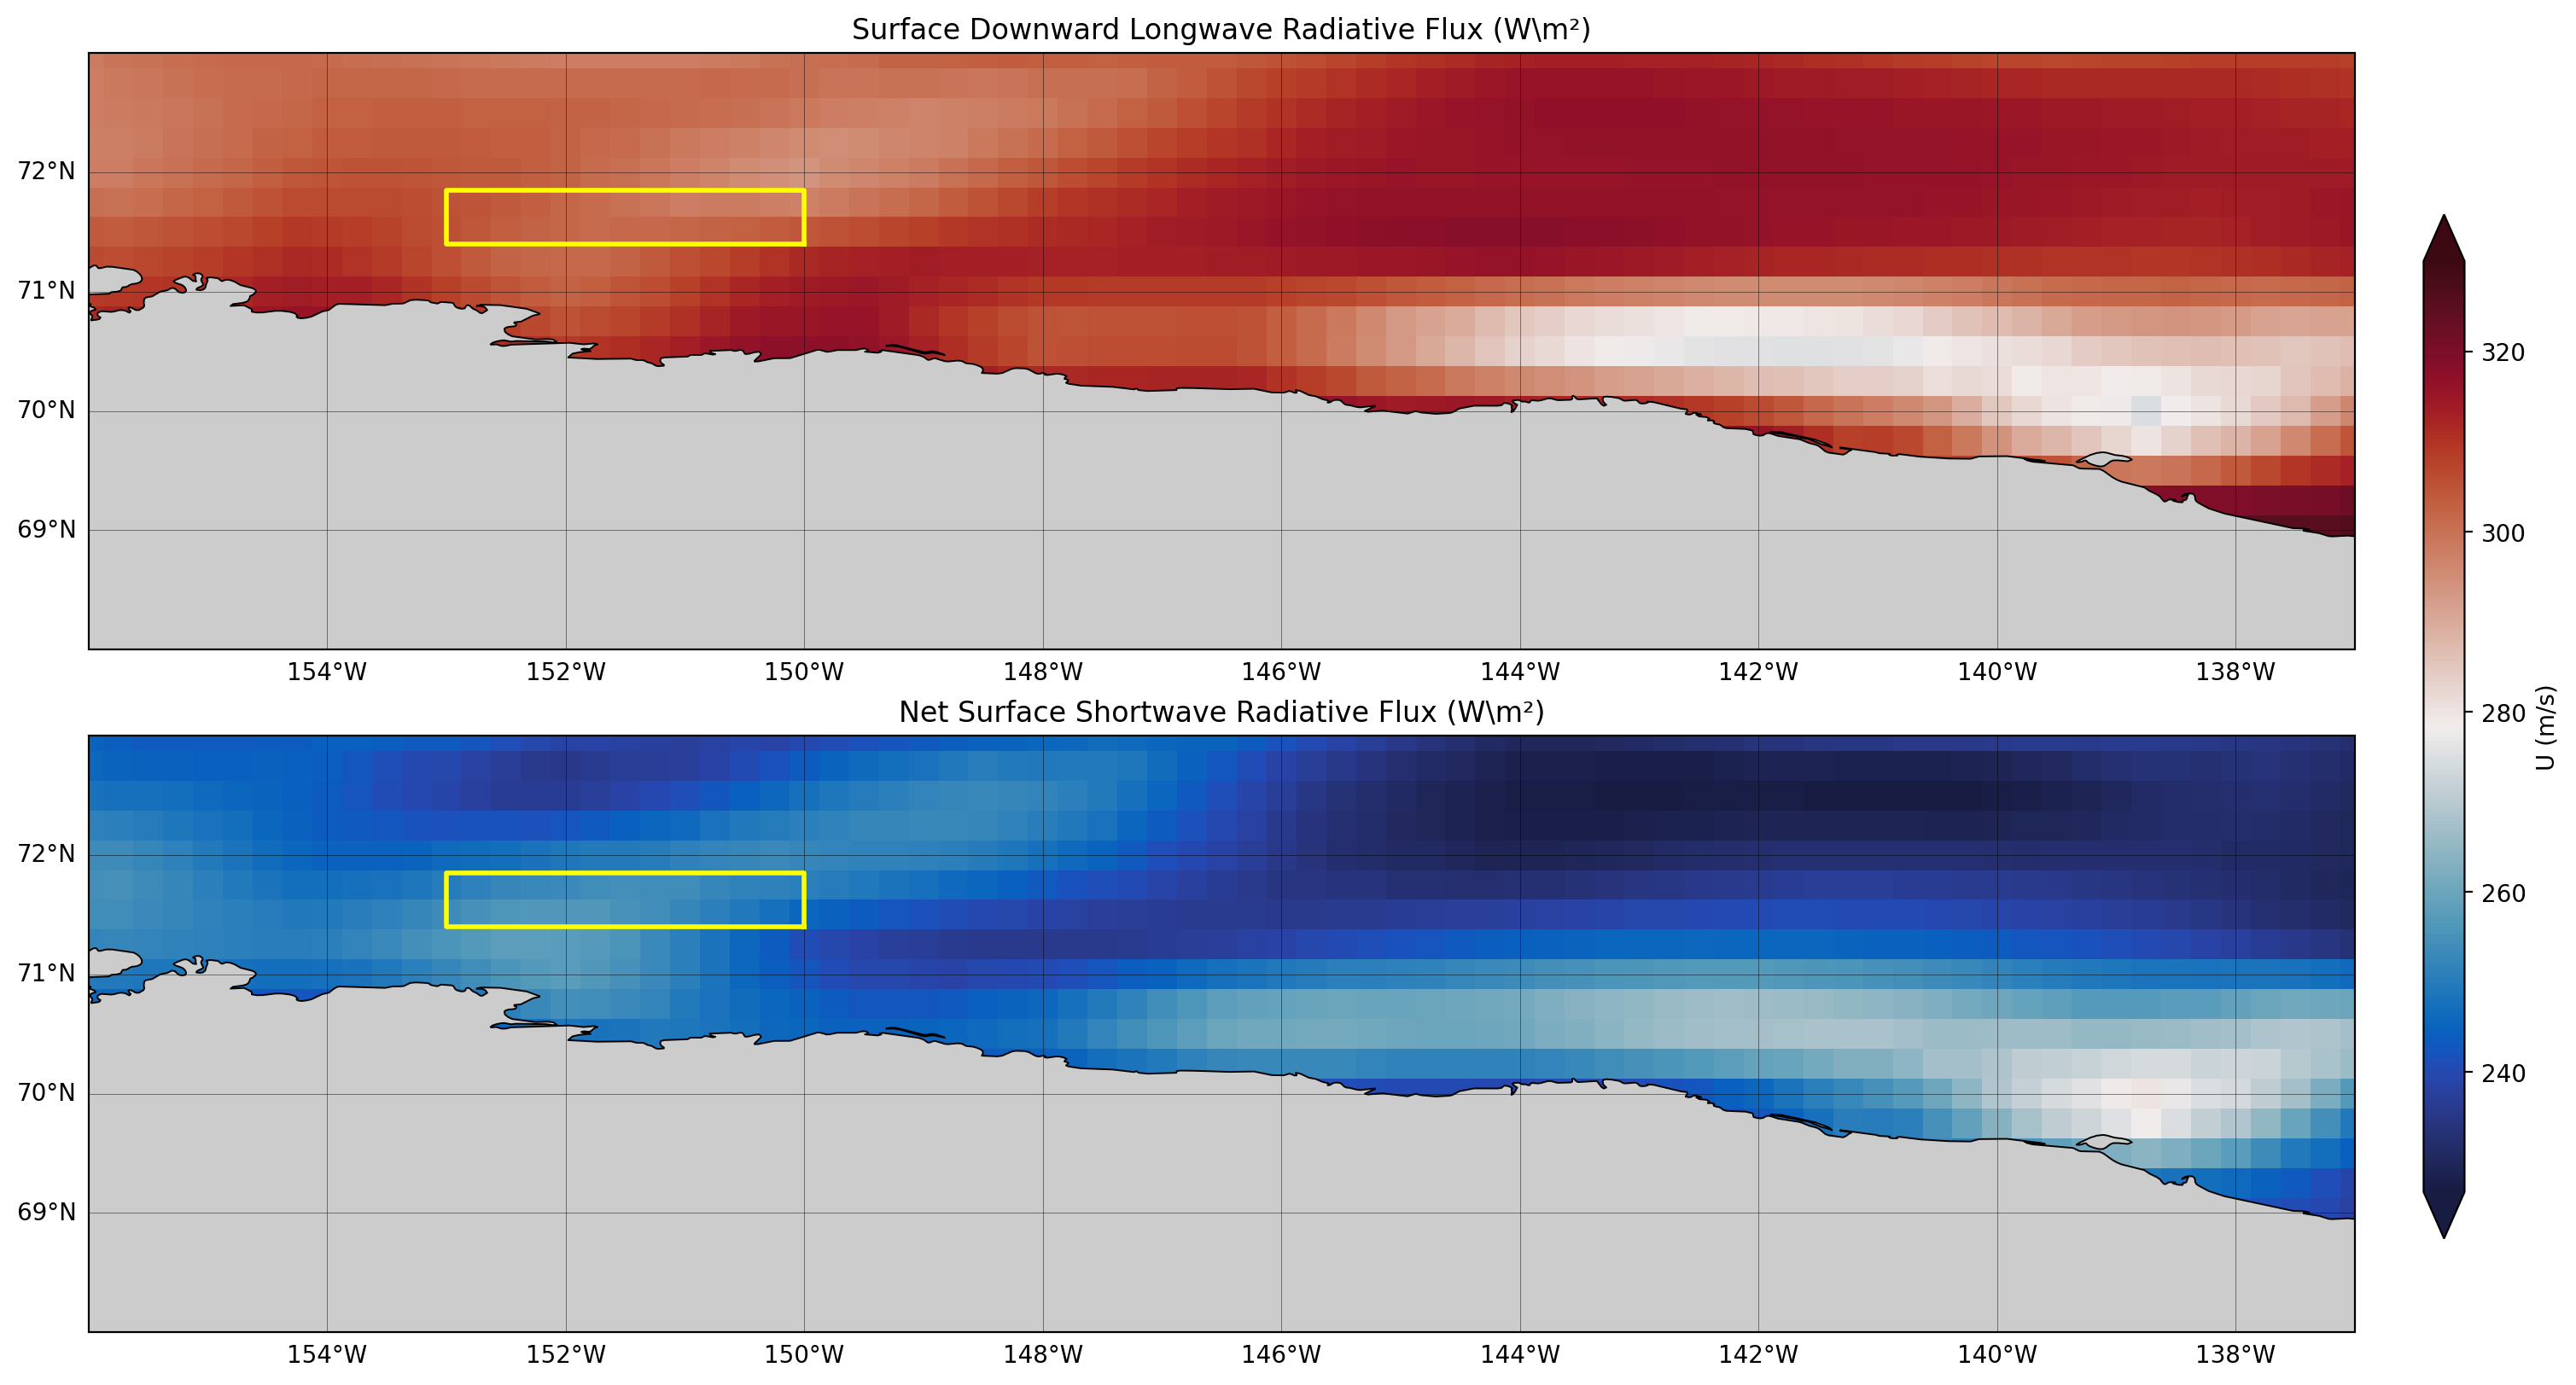

In [7]:
# Plot the region that the data covers
# Box 1

# Make bathymetry levels
lev_bathy = np.arange(10,110,10)

# Make the figure 
fig, ax = plt.subplots(2, 1, figsize=(16,8), dpi=200,
                       constrained_layout=True, 
                       subplot_kw={'projection': crs})

# Plot surface u at 2019-09-01 
m1 = era5_longwave.avg_sdlwrf.sel(valid_time='2019-09-15 00:00:00', method='nearest').plot(
    x='longitude', y='latitude',
    ax=ax[0],
    cmap=cmo.balance, transform=ccrs.PlateCarree(),
    add_colorbar=False, facecolor="gray",
)
ax[0].set_title('Surface Downward Longwave Radiative Flux (W\m\u00b2)')

# Plot surface u at 2019-09-15
m2 = era5_shortwave.avg_snswrf.sel(valid_time='2019-09-15 00:00:00', method='nearest').plot(
    x='longitude', y='latitude',
    ax=ax[1],
    cmap=cmo.balance, transform=ccrs.PlateCarree(),
    add_colorbar=False, facecolor="gray",
)
ax[1].set_title('Net Surface Shortwave Radiative Flux (W\m\u00b2)')


# Make a shared colorbar 
cbar_ax1 = fig.add_axes([0.94,0.10,0.015,0.75])
fig.colorbar(m1,ax=ax,extend='both',
             label='U (m/s)',
             pad=0.03, cax=cbar_ax1)

# Add other details to each subplot
for r in range(2):
    # Set extent and map features
    ax[r].set_extent([-156,-137,68, 73],ccrs.PlateCarree())
    ax[r].add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                                facecolor='0.8'), linewidth=.7)
    ax[r].coastlines(resolution='10m', linewidth=.7)

    # Add bathymetry for the domain
    #ax[r].contour(grid.lon_rho, grid.lat_rho, grid.h, levels=lev_bathy, colors='dimgrey')

    gl = ax[r].gridlines(crs=ccrs.PlateCarree(), 
                    draw_labels=True, 
                    x_inline=False, y_inline=False, 
                    linewidth=0.33, color='k',alpha=0.5)
    gl.right_labels = gl.top_labels = False
    gl.xlocator = ticker.FixedLocator([-156, -154, -152, -150,-148,-146,-144,-142, -140, -138])
    gl.xlabel_style = {'rotation': 0, 'ha': 'center'}

# Pick a region to analyze 
# Box 1
box_min_lon_01 = -150
box_max_lon_01 = -153
box_min_lat_01 = 71.4
box_max_lat_01 = 71.85
# Plot Box 1
ax[0].plot([box_min_lon_01, box_max_lon_01, box_max_lon_01, box_min_lon_01, box_min_lon_01],
        [box_min_lat_01, box_min_lat_01, box_max_lat_01, box_max_lat_01, box_min_lat_01],
        color='yellow', linestyle='-', linewidth=2)
ax[1].plot([box_min_lon_01, box_max_lon_01, box_max_lon_01, box_min_lon_01, box_min_lon_01],
        [box_min_lat_01, box_min_lat_01, box_max_lat_01, box_max_lat_01, box_min_lat_01],
        color='yellow', linestyle='-', linewidth=2)

fig.canvas.draw()
 


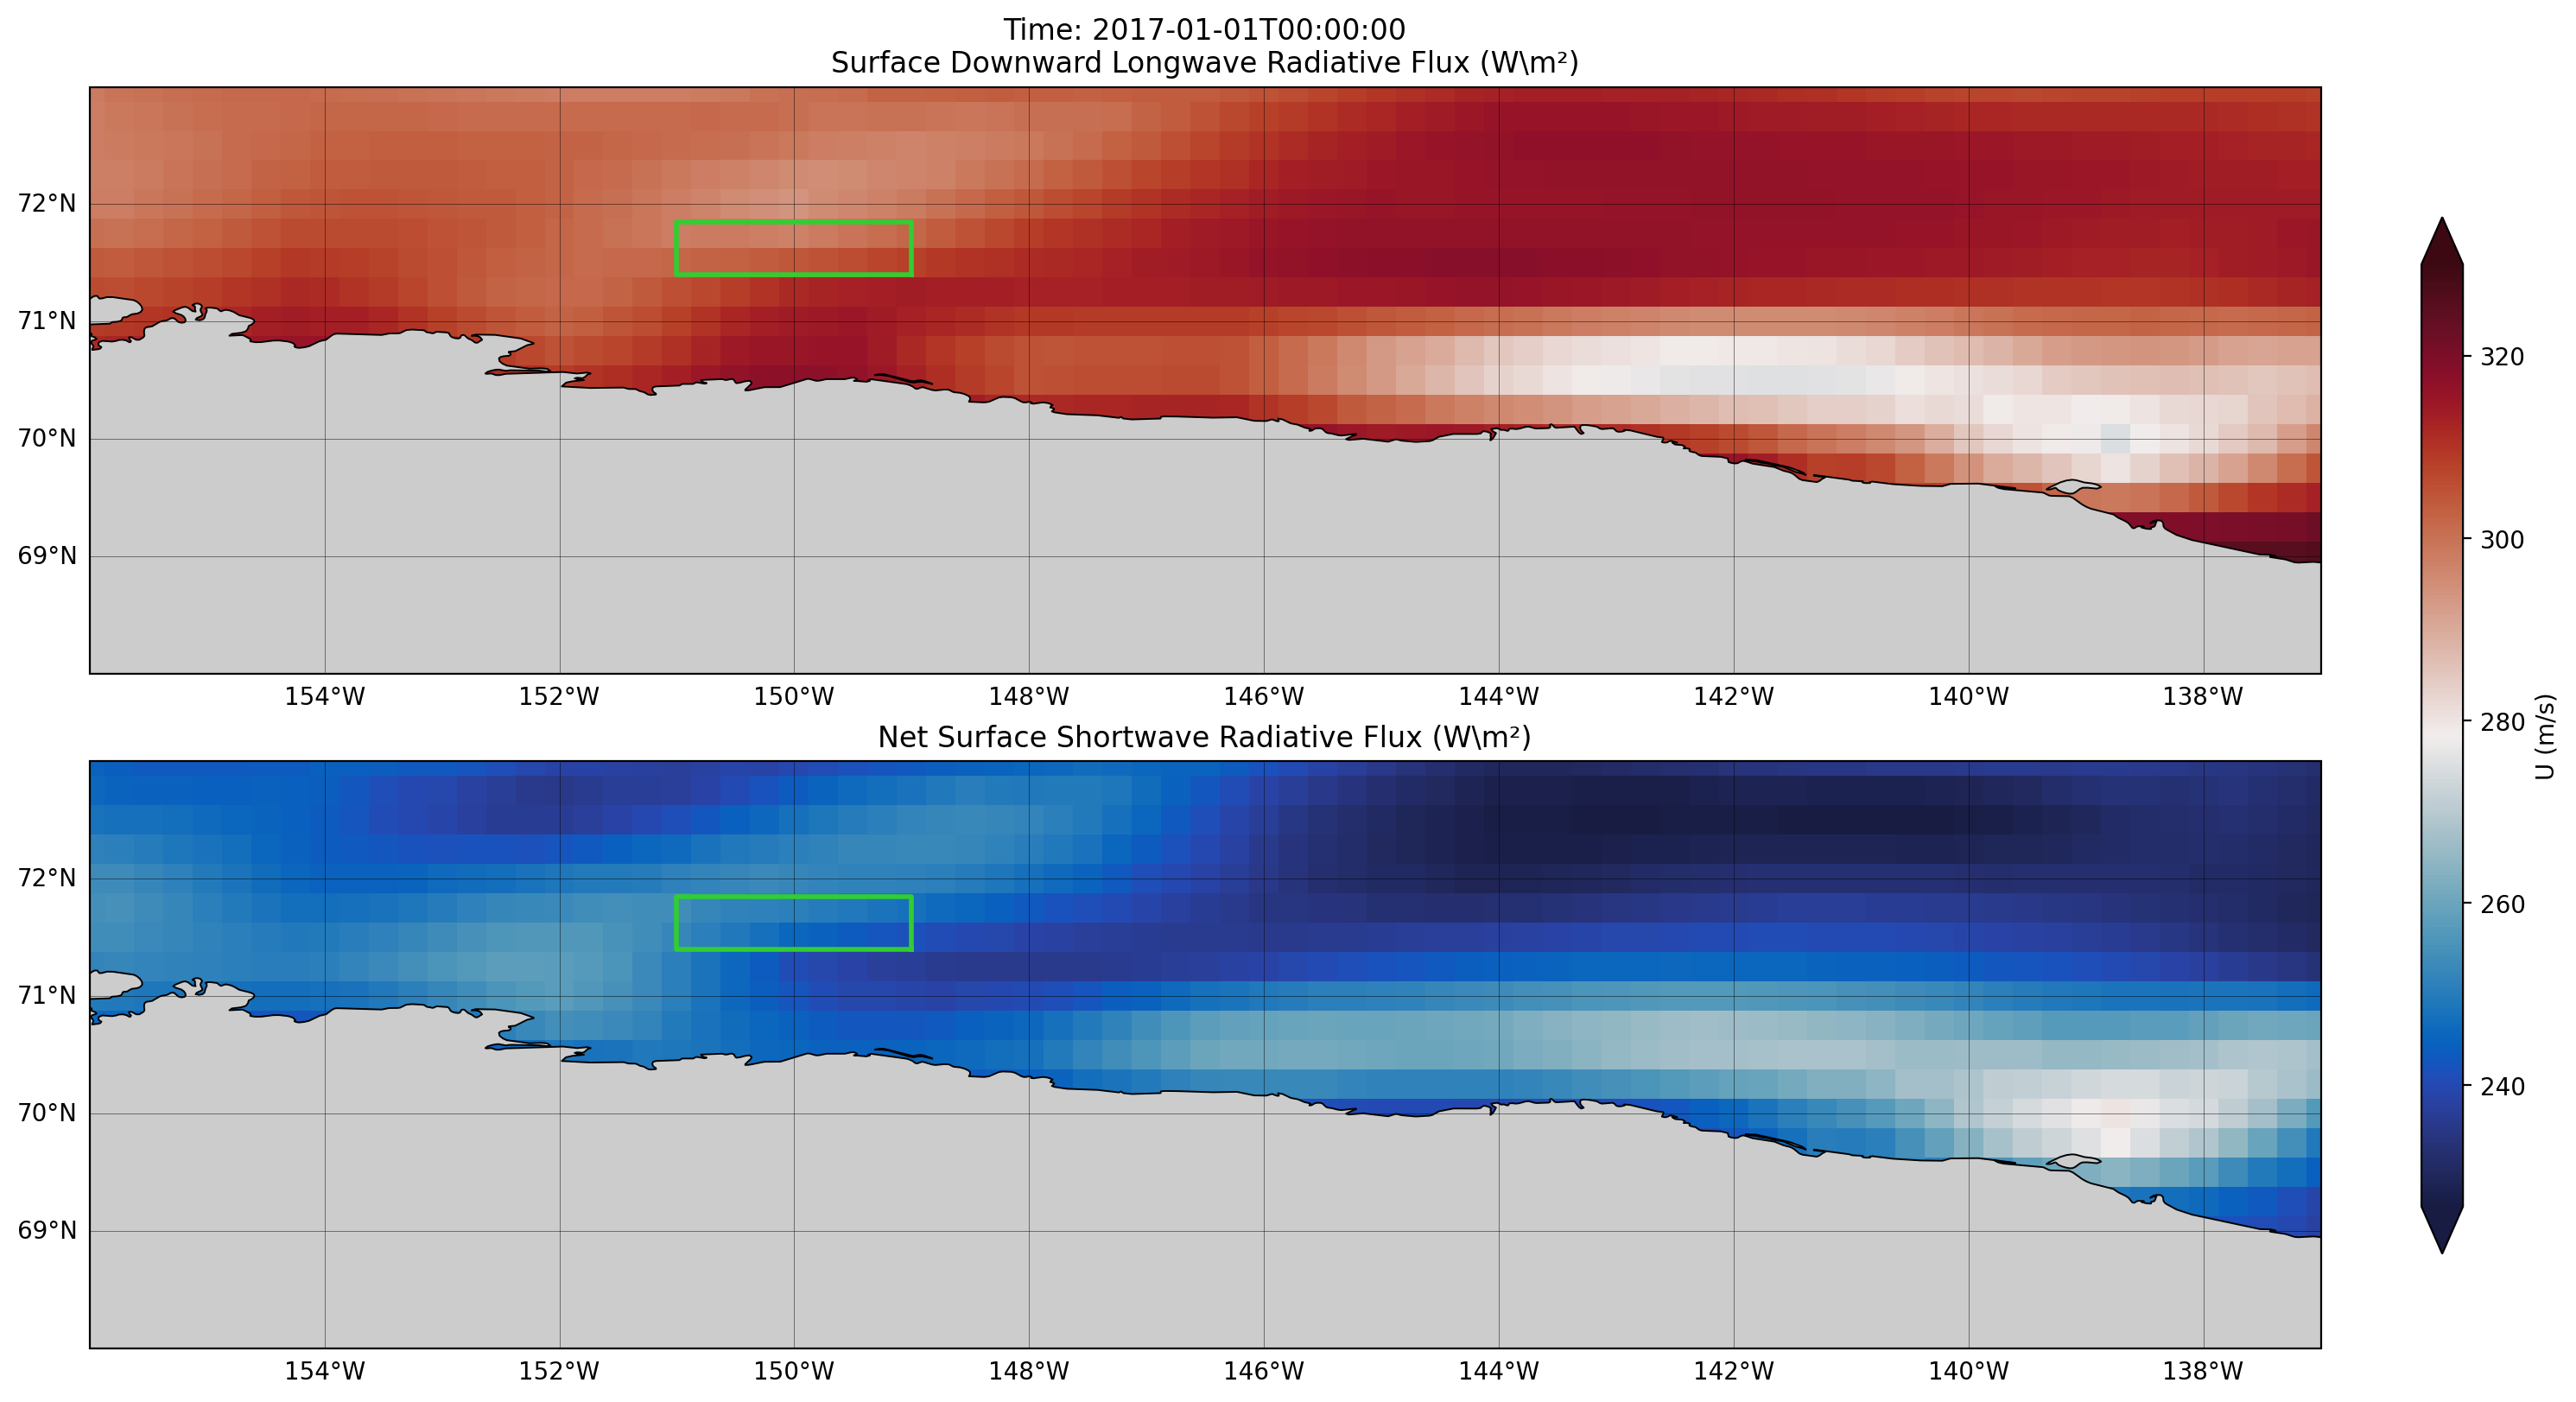

In [8]:
# Plot the region that the data covers
# Box 2

# Make bathymetry levels
lev_bathy = np.arange(10,110,10)

# Make the figure 
fig, ax = plt.subplots(2, 1, figsize=(16,8), dpi=200,
                       constrained_layout=True, 
                       subplot_kw={'projection': crs})

# Plot surface u at 2019-09-01 
m1 = era5_longwave.avg_sdlwrf.sel(valid_time='2019-09-15 00:00:00', method='nearest').plot(
    x='longitude', y='latitude',
    ax=ax[0],
    cmap=cmo.balance, transform=ccrs.PlateCarree(),
    add_colorbar=False, facecolor="gray",
)
ax[0].set_title('Time: ' + str(era5_longwave.valid_time[0].values)[:19] + '\nSurface Downward Longwave Radiative Flux (W\m\u00b2)')

# Plot surface u at 2019-09-15
m2 = era5_shortwave.avg_snswrf.sel(valid_time='2019-09-15 00:00:00', method='nearest').plot(
    x='longitude', y='latitude',
    ax=ax[1],
    cmap=cmo.balance, transform=ccrs.PlateCarree(),
    add_colorbar=False, facecolor="gray",
)
ax[1].set_title('Net Surface Shortwave Radiative Flux (W\m\u00b2)')


# Make a shared colorbar 
cbar_ax1 = fig.add_axes([0.94,0.10,0.015,0.75])
fig.colorbar(m1,ax=ax,extend='both',
             label='U (m/s)',
             pad=0.03, cax=cbar_ax1)

# Add other details to each subplot
for r in range(2):
    # Set extent and map features
    ax[r].set_extent([-156,-137,68, 73],ccrs.PlateCarree())
    ax[r].add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                                facecolor='0.8'), linewidth=.7)
    ax[r].coastlines(resolution='10m', linewidth=.7)

    # Add bathymetry for the domain
    #ax[r].contour(grid.lon_rho, grid.lat_rho, grid.h, levels=lev_bathy, colors='dimgrey')

    gl = ax[r].gridlines(crs=ccrs.PlateCarree(), 
                    draw_labels=True, 
                    x_inline=False, y_inline=False, 
                    linewidth=0.33, color='k',alpha=0.5)
    gl.right_labels = gl.top_labels = False
    gl.xlocator = ticker.FixedLocator([-156, -154, -152, -150,-148,-146,-144,-142, -140, -138])
    gl.xlabel_style = {'rotation': 0, 'ha': 'center'}

# Pick a region to analyze 
# Box 2
box_min_lon_02 = -149
box_max_lon_02 = -151
box_min_lat_02 = 71.4
box_max_lat_02 = 71.85
# Plot Box 2
ax[0].plot([box_min_lon_02, box_max_lon_02, box_max_lon_02, box_min_lon_02, box_min_lon_02],
        [box_min_lat_02, box_min_lat_02, box_max_lat_02, box_max_lat_02, box_min_lat_02],
        color='limegreen', linestyle='-', linewidth=2)
ax[1].plot([box_min_lon_02, box_max_lon_02, box_max_lon_02, box_min_lon_02, box_min_lon_02],
        [box_min_lat_02, box_min_lat_02, box_max_lat_02, box_max_lat_02, box_min_lat_02],
        color='limegreen', linestyle='-', linewidth=2)

fig.canvas.draw()

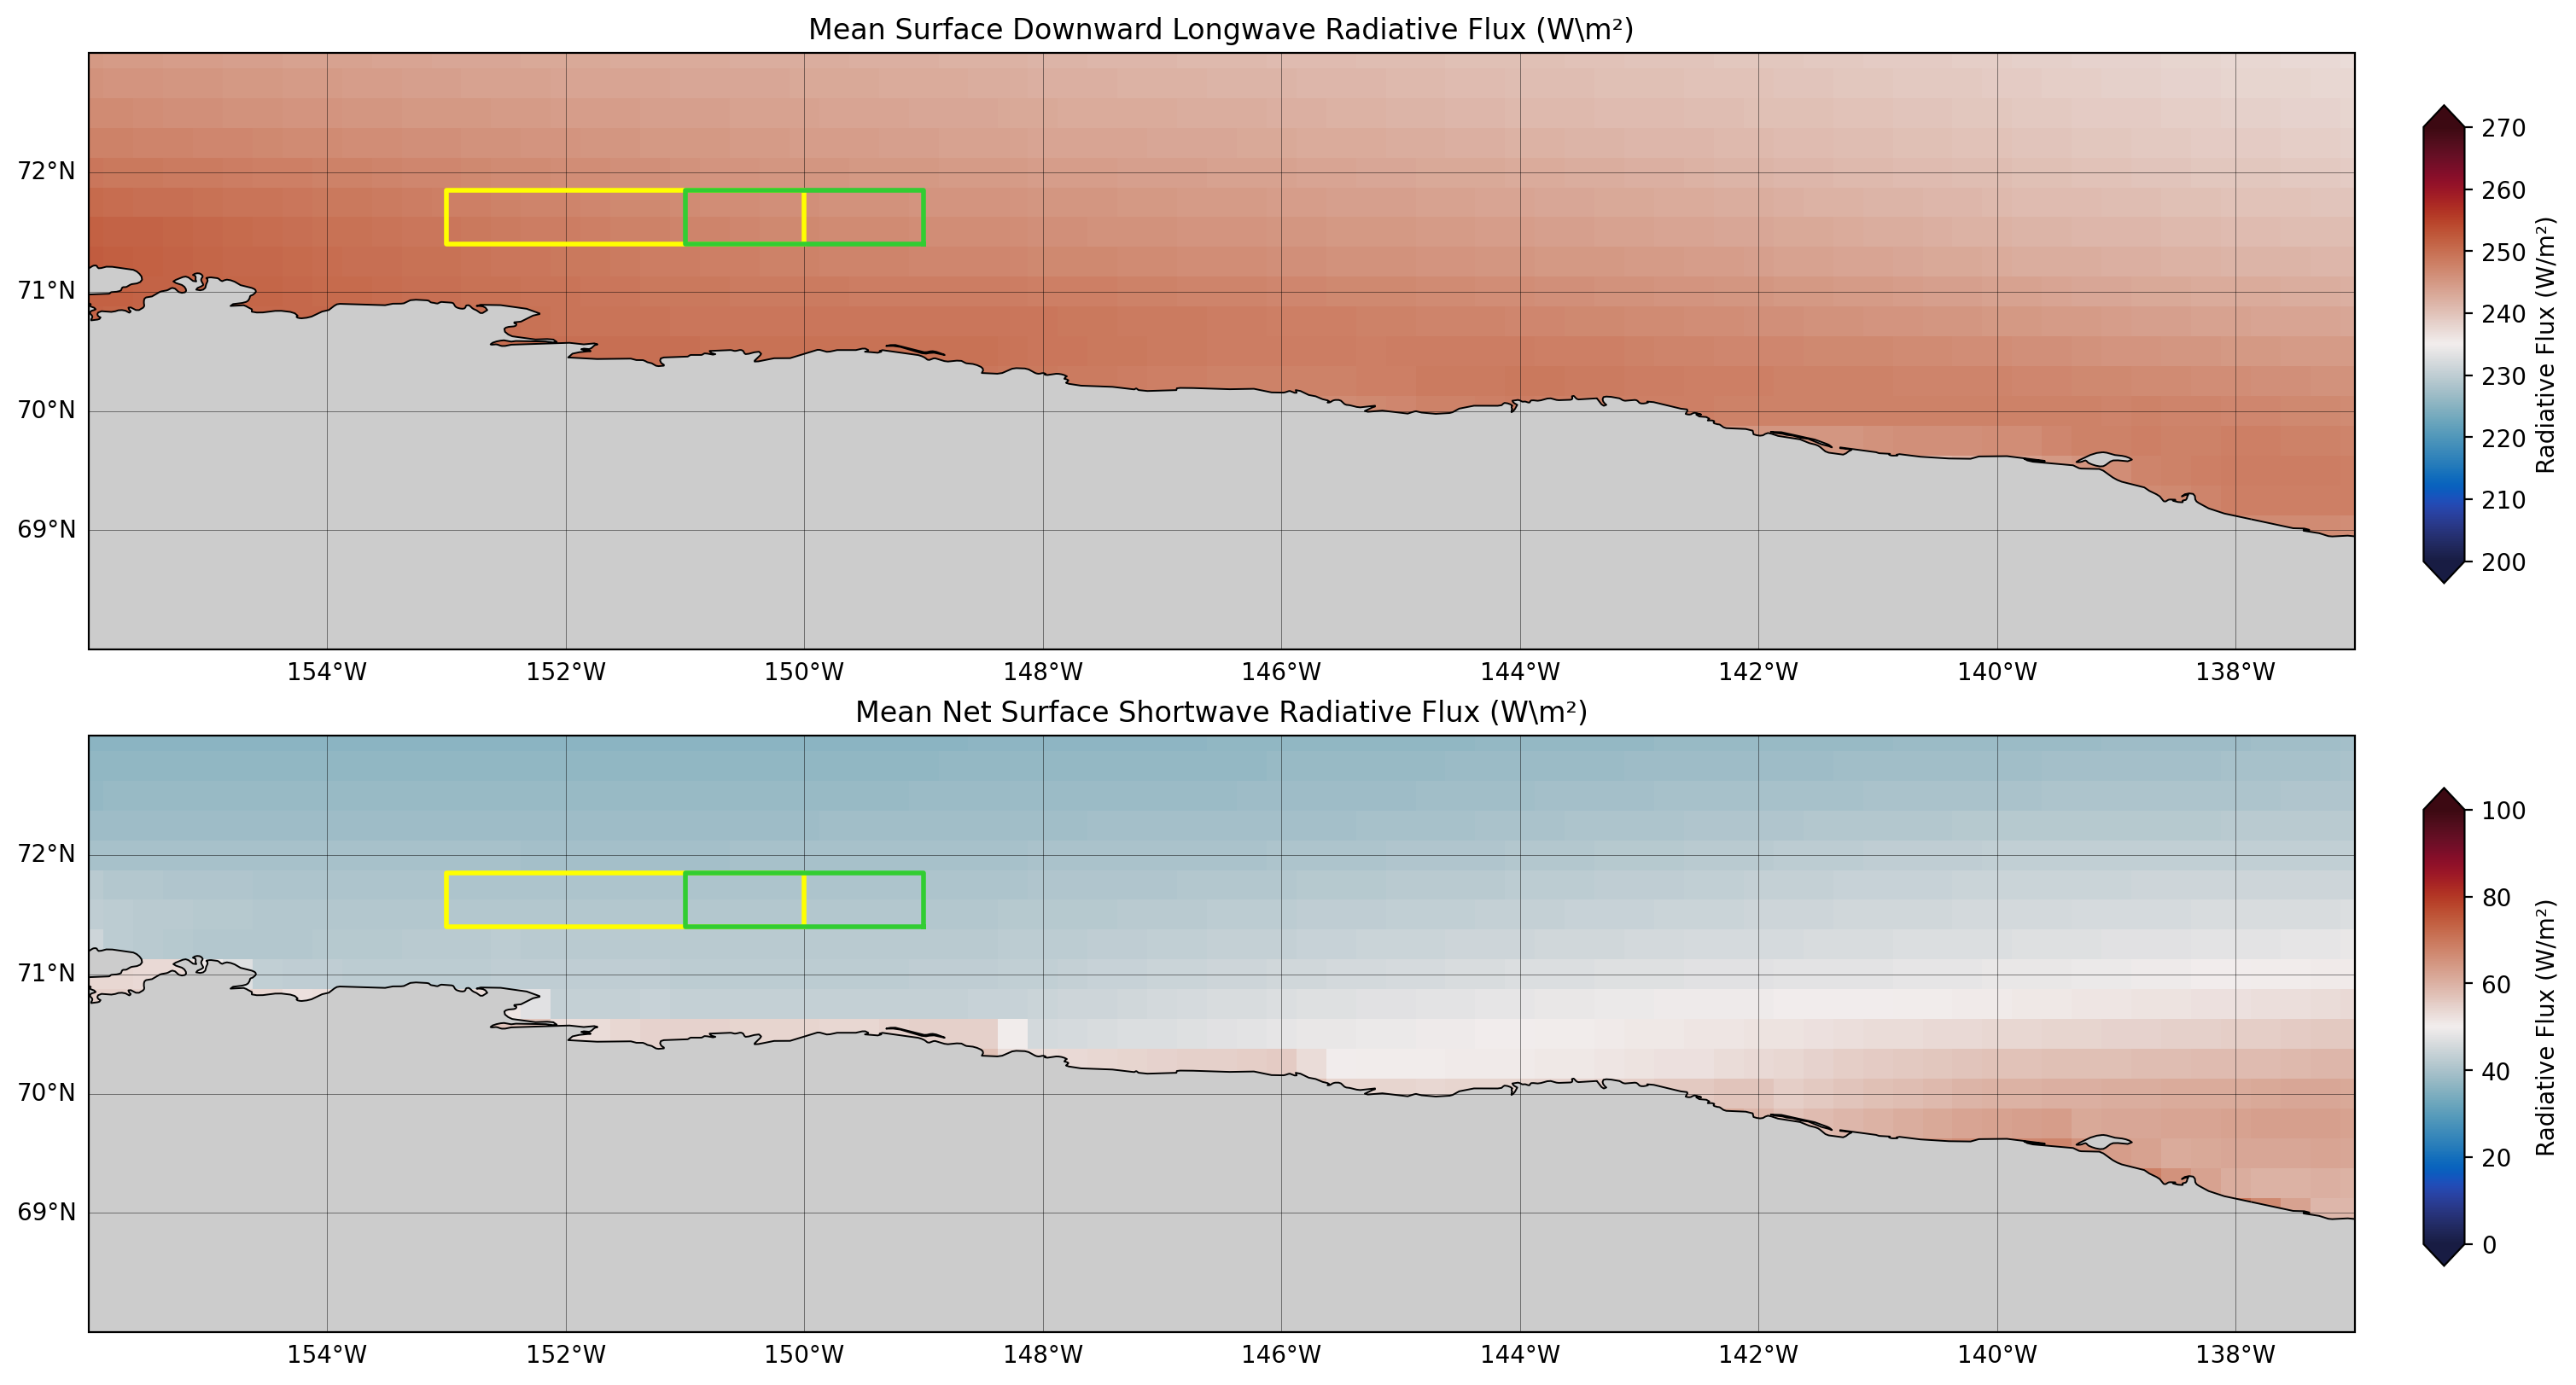

In [9]:
# Plot means
# Put both boxes

# Make bathymetry levels
lev_bathy = np.arange(10,110,10)

# Make the figure 
fig, ax = plt.subplots(2, 1, figsize=(16,8), dpi=200,
                       constrained_layout=True, 
                       subplot_kw={'projection': crs})

# Plot surface u at 2019-09-01 
m1 = era5_longwave.avg_sdlwrf.mean(dim='valid_time').plot(
    x='longitude', y='latitude',
    ax=ax[0],
    cmap=cmo.balance, transform=ccrs.PlateCarree(),
    add_colorbar=False, facecolor="gray",
    vmin=200, vmax=270
)
ax[0].set_title('Mean Surface Downward Longwave Radiative Flux (W\m\u00b2)')

# Plot surface u at 2019-09-15
m2 = era5_shortwave.avg_snswrf.mean(dim='valid_time').plot(
    x='longitude', y='latitude',
    ax=ax[1],
    cmap=cmo.balance, transform=ccrs.PlateCarree(),
    add_colorbar=False, facecolor="gray",
    vmin=0, vmax=100
)
ax[1].set_title('Mean Net Surface Shortwave Radiative Flux (W\m\u00b2)')


# Make a colorbar for each plot
# Longwave
cbar_ax1 = fig.add_axes([0.94,0.58,0.015,0.35])
fig.colorbar(m1,ax=ax,extend='both',
             label='Radiative Flux (W/m\u00b2)',
             pad=0.03, cax=cbar_ax1)
# Shortwave
cbar_ax2 = fig.add_axes([0.94,0.08,0.015,0.35])
fig.colorbar(m2,ax=ax,extend='both',
             label='Radiative Flux (W/m\u00b2)',
             pad=0.03, cax=cbar_ax2)

# Add other details to each subplot
for r in range(2):
    # Set extent and map features
    ax[r].set_extent([-156,-137,68, 73],ccrs.PlateCarree())
    ax[r].add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                                facecolor='0.8'), linewidth=.7)
    ax[r].coastlines(resolution='10m', linewidth=.7)

    # Add bathymetry for the domain
    #ax[r].contour(grid.lon_rho, grid.lat_rho, grid.h, levels=lev_bathy, colors='dimgrey')

    gl = ax[r].gridlines(crs=ccrs.PlateCarree(), 
                    draw_labels=True, 
                    x_inline=False, y_inline=False, 
                    linewidth=0.33, color='k',alpha=0.5)
    gl.right_labels = gl.top_labels = False
    gl.xlocator = ticker.FixedLocator([-156, -154, -152, -150,-148,-146,-144,-142, -140, -138])
    gl.xlabel_style = {'rotation': 0, 'ha': 'center'}

# Pick a region to analyze 
# Box 1
box_min_lon_01 = -150
box_max_lon_01 = -153
box_min_lat_01 = 71.4
box_max_lat_01 = 71.85
# Plot Box 1
ax[0].plot([box_min_lon_01, box_max_lon_01, box_max_lon_01, box_min_lon_01, box_min_lon_01],
        [box_min_lat_01, box_min_lat_01, box_max_lat_01, box_max_lat_01, box_min_lat_01],
        color='yellow', linestyle='-', linewidth=2)
ax[1].plot([box_min_lon_01, box_max_lon_01, box_max_lon_01, box_min_lon_01, box_min_lon_01],
        [box_min_lat_01, box_min_lat_01, box_max_lat_01, box_max_lat_01, box_min_lat_01],
        color='yellow', linestyle='-', linewidth=2)
# Box 2
box_min_lon_02 = -149
box_max_lon_02 = -151
box_min_lat_02 = 71.4
box_max_lat_02 = 71.85
# Plot Box 2
ax[0].plot([box_min_lon_02, box_max_lon_02, box_max_lon_02, box_min_lon_02, box_min_lon_02],
        [box_min_lat_02, box_min_lat_02, box_max_lat_02, box_max_lat_02, box_min_lat_02],
        color='limegreen', linestyle='-', linewidth=2)
ax[1].plot([box_min_lon_02, box_max_lon_02, box_max_lon_02, box_min_lon_02, box_min_lon_02],
        [box_min_lat_02, box_min_lat_02, box_max_lat_02, box_max_lat_02, box_min_lat_02],
        color='limegreen', linestyle='-', linewidth=2)

fig.canvas.draw()
 


In [10]:
print('ERA5 longwave min: ', era5_longwave.avg_sdlwrf.min().values)
print('ERA5 longwave max: ', era5_longwave.avg_sdlwrf.max().values)
print('ERA5 longwave mean: ', era5_longwave.avg_sdlwrf.mean().values)
print('ERA5 longwave stddev: ', era5_longwave.avg_sdlwrf.std().values)
print('ERA5 shortwave min: ', era5_shortwave.avg_snswrf.min().values)
print('ERA5 shortwave max: ', era5_shortwave.avg_snswrf.max().values)
print('ERA5 shortwave mean: ', era5_shortwave.avg_snswrf.mean().values)
print('ERA5 shortwave stddev: ', era5_shortwave.avg_snswrf.std().values)

ERA5 longwave min:  89.03322
ERA5 longwave max:  417.18604
ERA5 longwave mean:  243.2532
ERA5 longwave stddev:  59.915897
ERA5 shortwave min:  9.999997e-16
ERA5 shortwave max:  677.59375
ERA5 shortwave mean:  52.106503
ERA5 shortwave stddev:  95.75219


In [11]:
# Make a movie of the surface fluxes

# Import the needed packages
from joblib import Parallel, delayed

# Define a function to plot each frame for a given time
def plot_frame(t):

    # Make bathymetry levels
    lev_bathy = np.arange(10,110,10)

    # Make the figure 
    fig, ax = plt.subplots(2, 1, figsize=(16,8), dpi=200,
                    constrained_layout=True, 
                    subplot_kw={'projection': crs})

    # Plot surface u at 2019-09-01 
    m1 = era5_longwave.avg_sdlwrf[t,:,:].plot(
        x='longitude', y='latitude',
        ax=ax[0],
        cmap=cmo.thermal, transform=ccrs.PlateCarree(),
        add_colorbar=False, facecolor="gray",
        vmin=200, vmax=270
    )
    ax[0].set_title('Time: ' + str(era5_longwave.valid_time[t].values)[:19] + '\nSurface Downward Longwave Radiative Flux (W\m\u00b2)')

    # Plot surface u at 2019-09-15
    m2 = era5_shortwave.avg_snswrf[t,:,:].plot(
        x='longitude', y='latitude',
        ax=ax[1],
        cmap=cmo.solar, transform=ccrs.PlateCarree(),
        add_colorbar=False, facecolor="gray",
        vmin=0, vmax=60
    )
    ax[1].set_title('Net Surface Shortwave Radiative Flux (W\m\u00b2)')


    # Make a colorbar for each plot
    # Longwave
    cbar_ax1 = fig.add_axes([0.94,0.58,0.015,0.35])
    fig.colorbar(m1,ax=ax,extend='both',
            label='Radiative Flux (W/m\u00b2)',
            pad=0.03, cax=cbar_ax1)
    # Shortwave
    cbar_ax2 = fig.add_axes([0.94,0.08,0.015,0.35])
    fig.colorbar(m2,ax=ax,extend='both',
          label='Radiative Flux (W/m\u00b2)',
          pad=0.03, cax=cbar_ax2)

    # Add other details to each subplot
    for r in range(2):
        # Set extent and map features
        ax[r].set_extent([-156,-137,68, 73],ccrs.PlateCarree())
        ax[r].add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                                        facecolor='0.8'), linewidth=.7)
        ax[r].coastlines(resolution='10m', linewidth=.7)

    # Add bathymetry for the domain
    #ax[r].contour(grid.lon_rho, grid.lat_rho, grid.h, levels=lev_bathy, colors='dimgrey')
    
    gl = ax[r].gridlines(crs=ccrs.PlateCarree(), 
                    draw_labels=True, 
                    x_inline=False, y_inline=False, 
                    linewidth=0.33, color='k',alpha=0.5)
    gl.right_labels = gl.top_labels = False
    gl.xlocator = ticker.FixedLocator([-156, -154, -152, -150,-148,-146,-144,-142, -140, -138])
    gl.xlabel_style = {'rotation': 0, 'ha': 'center'}
    
    # Pick a region to analyze 
    # Box 1
    box_min_lon_01 = -150
    box_max_lon_01 = -153
    box_min_lat_01 = 71.4
    box_max_lat_01 = 71.85
    # Plot Box 1
    ax[0].plot([box_min_lon_01, box_max_lon_01, box_max_lon_01, box_min_lon_01, box_min_lon_01],
            [box_min_lat_01, box_min_lat_01, box_max_lat_01, box_max_lat_01, box_min_lat_01],
            color='yellow', linestyle='-', linewidth=2)
    ax[1].plot([box_min_lon_01, box_max_lon_01, box_max_lon_01, box_min_lon_01, box_min_lon_01],
            [box_min_lat_01, box_min_lat_01, box_max_lat_01, box_max_lat_01, box_min_lat_01],
            color='yellow', linestyle='-', linewidth=2)
    # Box 2
    box_min_lon_02 = -149
    box_max_lon_02 = -151
    box_min_lat_02 = 71.4
    box_max_lat_02 = 71.85
    # Plot Box 2
    ax[0].plot([box_min_lon_02, box_max_lon_02, box_max_lon_02, box_min_lon_02, box_min_lon_02],
            [box_min_lat_02, box_min_lat_02, box_max_lat_02, box_max_lat_02, box_min_lat_02],
            color='limegreen', linestyle='-', linewidth=2)
    ax[1].plot([box_min_lon_02, box_max_lon_02, box_max_lon_02, box_min_lon_02, box_min_lon_02],
            [box_min_lat_02, box_min_lat_02, box_max_lat_02, box_max_lat_02, box_min_lat_02],
            color='limegreen', linestyle='-', linewidth=2)
    
    fig.canvas.draw()

    # Save the figure
    plt.savefig(
        #f'/pscratch/sd/b/bundzis/Beaufort_ROMS_2020_nosed_dvd_myroms_scratch/Movies/Rel_vort_surf_salt_temp_mnum/Attempt004/surf_zetaf_salt_temp_mnum_mpdata_kelvin_{i}.png',
        f'/pscratch/sd/b/bundzis/Beaufort_ROMS_idealized_jet_scratch/Movies/Surface_heat/Plots02/surf_longwave_shortwave_{t}.png',
        dpi=200, bbox_inches='tight'
    )
    plt.close(fig)  # Close to avoid memory leaks

In [12]:
# Run n_jobs plots in parallel at once (adjust n_jobs based on your CPU)
# Uncomment below to run to make the movie/plots for the movie 
#Parallel(n_jobs=4)(delayed(plot_frame)(t) for t in range(0, len(era5_longwave.valid_time), 1))

In [13]:
# Look at frequency? or min/max/mean? or all the above?
# Could also make spatially-averaged time series for the boxes...that 
# probably makes the most sense and can easily be turned into a ROMS
# forcing file 


In [14]:
# Convert to 360 bassed lat/lon
# Box 1
box_min_lon_01_360 = box_max_lon_01 + 360 
box_max_lon_01_360 = box_min_lon_01 + 360 
# Box 2
box_min_lon_02_360 = box_max_lon_02 + 360 
box_max_lon_02_360 = box_min_lon_02 + 360 


print('Box 1 Bounds:')
print('min_lon: ', str(box_min_lon_01) + ' (W) or ' + str(box_min_lon_01_360) + ' (0 - 360)')
print('max_lon: ', str(box_max_lon_01) + ' (W) or ' + str(box_max_lon_01_360) + ' (0 - 360)')
print('min_lat: ', box_min_lat_01)
print('max_lat: ', box_max_lat_01)
print('Box 2 Bounds:')
print('min_lon: ', str(box_min_lon_02) + ' (W) or ' + str(box_min_lon_02_360) + ' (0 - 360)')
print('max_lon: ', str(box_max_lon_02) + ' (W) or ' + str(box_max_lon_02_360) + ' (0 - 360)')
print('min_lat: ', box_min_lat_02)
print('max_lat: ', box_max_lat_02)

# Get the data in our two boxes
# Box 1
longwave_reg1 = era5_longwave.avg_sdlwrf.sel(longitude=slice(box_max_lon_01, box_min_lon_01), latitude=slice(72, 71))
shortwave_reg1 = era5_shortwave.avg_snswrf.sel(longitude=slice(box_max_lon_01, box_min_lon_01), latitude=slice(72, 71))
# Box 2
longwave_reg2 = era5_longwave.avg_sdlwrf.sel(longitude=slice(box_max_lon_02, box_min_lon_02), latitude=slice(72, 71))
shortwave_reg2 = era5_shortwave.avg_snswrf.sel(longitude=slice(box_max_lon_02, box_min_lon_02), latitude=slice(72, 71))

Box 1 Bounds:
min_lon:  -150 (W) or 207 (0 - 360)
max_lon:  -153 (W) or 210 (0 - 360)
min_lat:  71.4
max_lat:  71.85
Box 2 Bounds:
min_lon:  -149 (W) or 209 (0 - 360)
max_lon:  -151 (W) or 211 (0 - 360)
min_lat:  71.4
max_lat:  71.85


In [15]:
print(era5_longwave.latitude.values)
print(era5_longwave.longitude.values)

[73.   72.75 72.5  72.25 72.   71.75 71.5  71.25 71.   70.75 70.5  70.25
 70.   69.75 69.5  69.25 69.   68.75 68.5  68.25 68.  ]
[-156.   -155.75 -155.5  -155.25 -155.   -154.75 -154.5  -154.25 -154.
 -153.75 -153.5  -153.25 -153.   -152.75 -152.5  -152.25 -152.   -151.75
 -151.5  -151.25 -151.   -150.75 -150.5  -150.25 -150.   -149.75 -149.5
 -149.25 -149.   -148.75 -148.5  -148.25 -148.   -147.75 -147.5  -147.25
 -147.   -146.75 -146.5  -146.25 -146.   -145.75 -145.5  -145.25 -145.
 -144.75 -144.5  -144.25 -144.   -143.75 -143.5  -143.25 -143.   -142.75
 -142.5  -142.25 -142.   -141.75 -141.5  -141.25 -141.   -140.75 -140.5
 -140.25 -140.   -139.75 -139.5  -139.25 -139.   -138.75 -138.5  -138.25
 -138.   -137.75 -137.5  -137.25 -137.  ]


In [16]:
longwave_reg1

<xarray.DataArray 'avg_sdlwrf' (valid_time: 70128, latitude: 5, longitude: 13)> Size: 18MB
array([[[171.6709 , 171.60059, ..., 169.24121, 168.76465],
        [184.62402, 183.3584 , ..., 170.94434, 170.45996],
        ...,
        [223.16309, 219.40527, ..., 184.37402, 181.52246],
        [240.25684, 237.06934, ..., 210.21777, 208.63965]],

       [[194.79964, 191.9012 , ..., 171.94026, 169.75276],
        [215.10432, 212.24495, ..., 185.38557, 183.15901],
        ...,
        [257.784  , 257.64337, ..., 225.94026, 221.13557],
        [265.33087, 265.33868, ..., 242.91682, 239.60432]],

       ...,

       [[145.49861, 145.52986, ..., 146.33455, 146.18611],
        [146.54549, 146.52205, ..., 145.3033 , 145.16267],
        ...,
        [146.34236, 146.13924, ..., 144.2408 , 144.08455],
        [146.37361, 146.1783 , ..., 149.07674, 150.53767]],

       [[144.48929, 144.52835, ..., 145.14554, 144.9346 ],
        [145.81741, 145.81741, ..., 144.10648, 143.89554],
        ...,
        [146.59866, 146.41898, ..., 144.20023, 143.98929],
        [146.09866, 145.85648, ..., 154.54398, 154.97366]]], dtype=float32)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 561kB 2017-01-01 ... 2024-12-31T2...
  * longitude   (longitude) float64 104B -153.0 -152.8 -152.5 ... -150.2 -150.0
  * latitude    (latitude) float64 40B 72.0 71.75 71.5 71.25 71.0
Attributes: (12/32)
    standard_name:                            unknown
    long_name:                                Time-mean surface downward long...
    units:                                    W m**-2
    GRIB_paramId:                             235036
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1617
    ...                                       ...
    GRIB_missingValue:                        3.4028234663852886e+38
    GRIB_name:                                Time-mean surface downward long...
    GRIB_shortName:                           avg_sdlwrf
    GRIB_totalNumber:                         0
    GRIB_units:                               W m**-2
    GRIB_surface:                             0.0

In [17]:
# Take the average over space but keep changes in time 
# Box 1 
longwave_reg1_avg = longwave_reg1.mean(dim=['latitude', 'longitude'])
shortwave_reg1_avg = shortwave_reg1.mean(dim=['latitude', 'longitude'])
# Box 2 
longwave_reg2_avg = longwave_reg2.mean(dim=['latitude', 'longitude'])
shortwave_reg2_avg = shortwave_reg2.mean(dim=['latitude', 'longitude'])

Text(0.5, 0, 'Year')

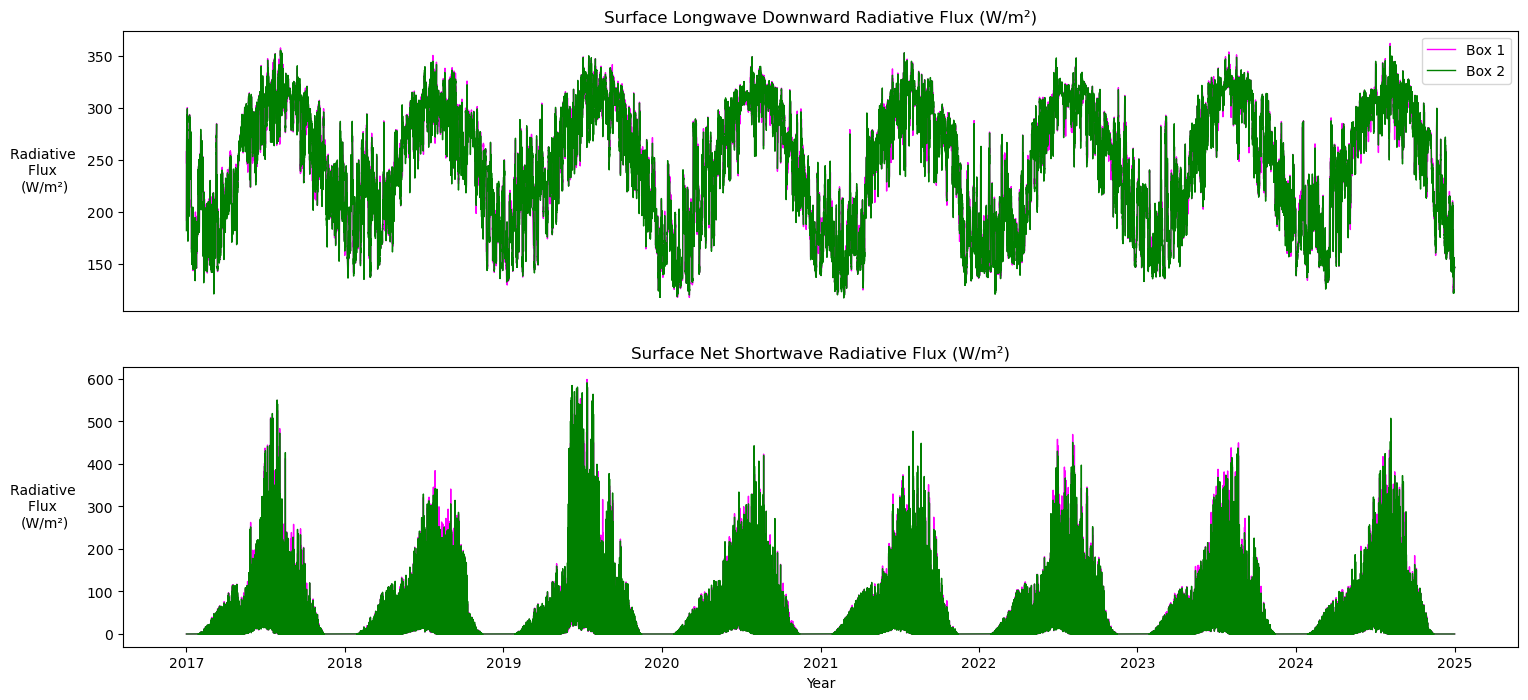

In [18]:
# Plot time series for these two regions (one panel for longwave
# and another for shortwave)

# Make the figure
fig, ax = plt.subplots(2, 1, figsize=(18,8))

# Longwave
ax[0].plot(era5_longwave.valid_time, longwave_reg1_avg, color='magenta', linewidth=1, label='Box 1')
ax[0].plot(era5_longwave.valid_time, longwave_reg2_avg, color='green', linewidth=1, label='Box 2')
ax[0].set_title('Surface Longwave Downward Radiative Flux (W/m\u00b2)')
ax[0].set_ylabel('Radiative \nFlux \n(W/m\u00b2)', rotation=0, va='center', labelpad=30)
ax[0].xaxis.set_visible(False)
ax[0].legend()

# Shortwave
ax[1].plot(era5_shortwave.valid_time, shortwave_reg1_avg, color='magenta', linewidth=1, label='Box 1')
ax[1].plot(era5_shortwave.valid_time, shortwave_reg2_avg, color='green', linewidth=1, label='Box 2')
ax[1].set_title('Surface Net Shortwave Radiative Flux (W/m\u00b2)')
ax[1].set_ylabel('Radiative \nFlux \n(W/m\u00b2)', rotation=0, va='center', labelpad=30)
ax[1].set_xlabel('Year')




In [19]:
# Make a version of the plot that has the average value
# for each day of each based on all of these years

# Calculate the average day of year
# Box 1
longwave_reg1_avg_doy = longwave_reg1_avg.groupby('valid_time.dayofyear').mean('valid_time')
shortwave_reg1_avg_doy = shortwave_reg1_avg.groupby('valid_time.dayofyear').mean('valid_time')
# Box 2
longwave_reg2_avg_doy = longwave_reg2_avg.groupby('valid_time.dayofyear').mean('valid_time')
shortwave_reg2_avg_doy = shortwave_reg2_avg.groupby('valid_time.dayofyear').mean('valid_time')

Text(0.5, 0, 'Day of Year')

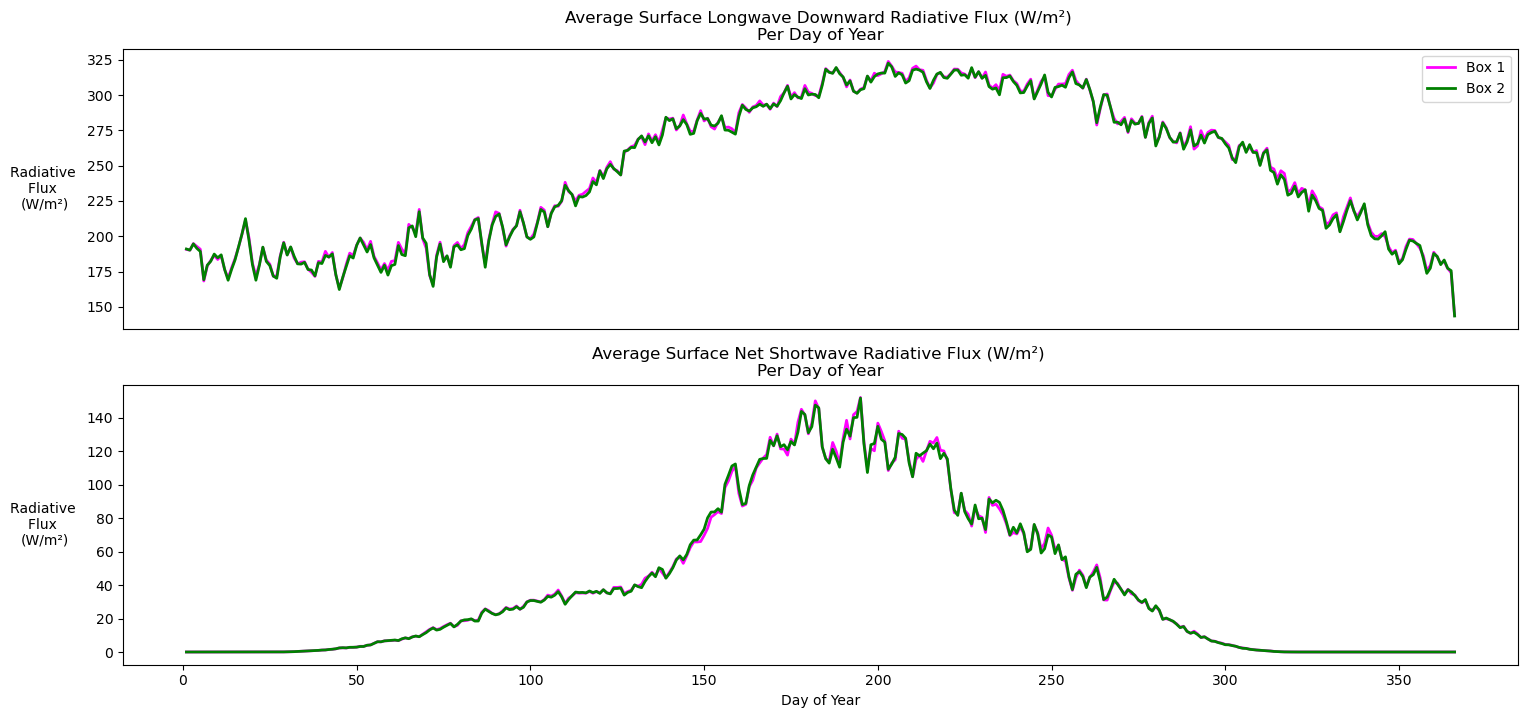

In [20]:
# Plot the average for day of year

# Make day of year array
day_of_year = np.arange(1, 367, 1)

# Make the figure
fig, ax = plt.subplots(2, 1, figsize=(18,8))

# Longwave
ax[0].plot(day_of_year, longwave_reg1_avg_doy, color='magenta', linewidth=2, label='Box 1')
ax[0].plot(day_of_year, longwave_reg2_avg_doy, color='green', linewidth=2, label='Box 2')
ax[0].set_title('Average Surface Longwave Downward Radiative Flux (W/m\u00b2) \nPer Day of Year')
ax[0].set_ylabel('Radiative \nFlux \n(W/m\u00b2)', rotation=0, va='center', labelpad=30)
ax[0].xaxis.set_visible(False)
ax[0].legend()

# Shortwave
ax[1].plot(day_of_year, shortwave_reg1_avg_doy, color='magenta', linewidth=2, label='Box 1')
ax[1].plot(day_of_year, shortwave_reg2_avg_doy, color='green', linewidth=2, label='Box 2')
ax[1].set_title('Average Surface Net Shortwave Radiative Flux (W/m\u00b2) \nPer Day of Year')
ax[1].set_ylabel('Radiative \nFlux \n(W/m\u00b2)', rotation=0, va='center', labelpad=30)
ax[1].set_xlabel('Day of Year')

Text(0.5, 0, 'Day of Year')

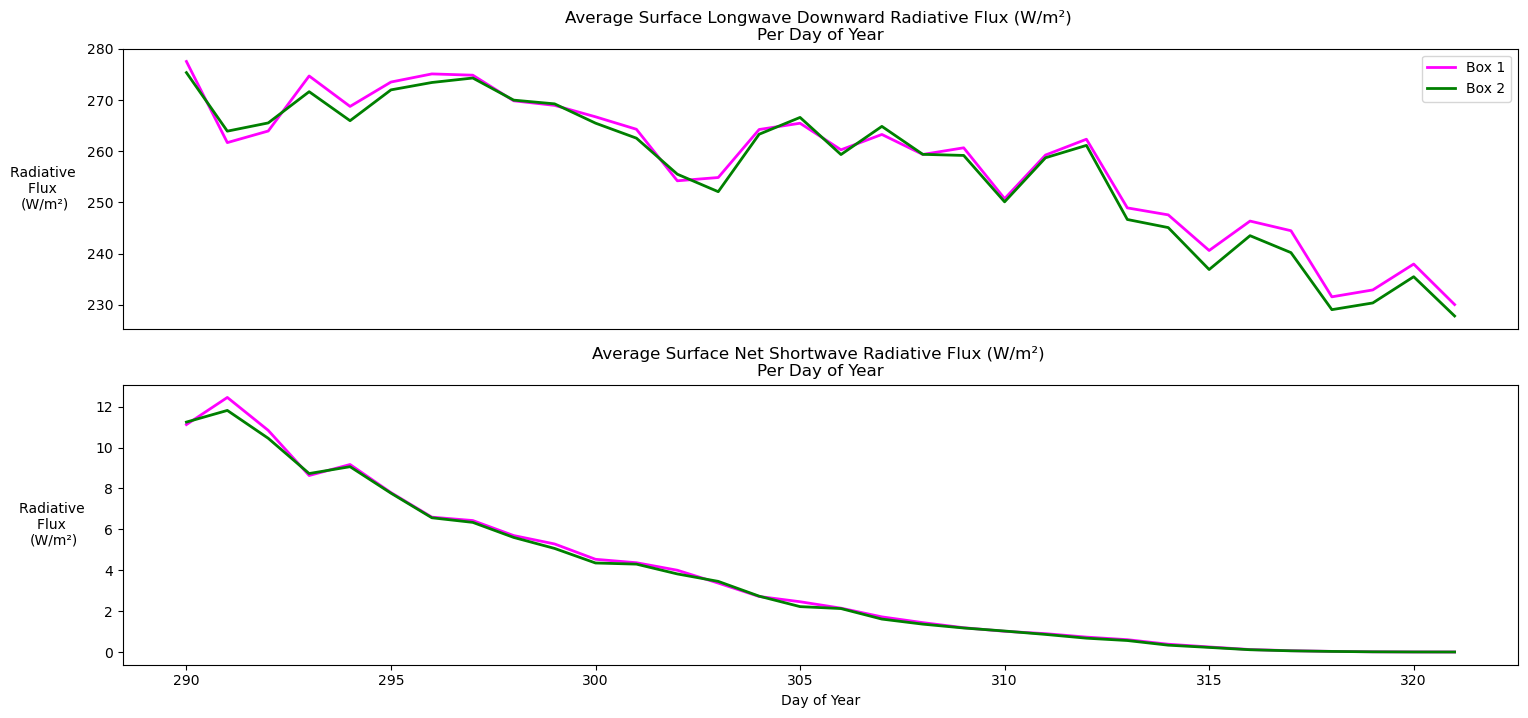

In [21]:
# Plot the values around freeze-up which is mid-October to mid-November (ish)
# September 15 - October 15 = days 289 - 320 (leap year)

# Make the figure
fig, ax = plt.subplots(2, 1, figsize=(18,8))

# Longwave
ax[0].plot(day_of_year[289:321], longwave_reg1_avg_doy[289:321], color='magenta', linewidth=2, label='Box 1')
ax[0].plot(day_of_year[289:321], longwave_reg2_avg_doy[289:321], color='green', linewidth=2, label='Box 2')
ax[0].set_title('Average Surface Longwave Downward Radiative Flux (W/m\u00b2) \nPer Day of Year')
ax[0].set_ylabel('Radiative \nFlux \n(W/m\u00b2)', rotation=0, va='center', labelpad=30)
ax[0].xaxis.set_visible(False)
ax[0].legend()

# Shortwave
ax[1].plot(day_of_year[289:321], shortwave_reg1_avg_doy[289:321], color='magenta', linewidth=2, label='Box 1')
ax[1].plot(day_of_year[289:321], shortwave_reg2_avg_doy[289:321], color='green', linewidth=2, label='Box 2')
ax[1].set_title('Average Surface Net Shortwave Radiative Flux (W/m\u00b2) \nPer Day of Year')
ax[1].set_ylabel('Radiative \nFlux \n(W/m\u00b2)', rotation=0, va='center', labelpad=30)
ax[1].set_xlabel('Day of Year')


In [22]:
# Do this again but since the data are hourly, 
# group by hour of day of year to rpeserve that frequency

# Box 1
# I think this gives the average values for that hour as a function of day of year 
longwave_reg1_avg_doy_hrly = longwave_reg1_avg.groupby(['valid_time.dayofyear', 'valid_time.hour']).mean('valid_time')
shortwave_reg1_avg_doy_hrly = shortwave_reg1_avg.groupby(['valid_time.dayofyear', 'valid_time.hour']).mean('valid_time')
# Box 2
longwave_reg2_avg_doy_hrly = longwave_reg2_avg.groupby(['valid_time.dayofyear', 'valid_time.hour']).mean('valid_time')
shortwave_reg2_avg_doy_hrly = shortwave_reg2_avg.groupby(['valid_time.dayofyear', 'valid_time.hour']).mean('valid_time')

In [23]:
longwave_reg1_avg_doy_hrly

<xarray.DataArray 'avg_sdlwrf' (dayofyear: 366, hour: 24)> Size: 35kB
array([[177.31012, 181.80516, 186.96677, ..., 193.0144 , 192.66351,
        191.7795 ],
       [188.72781, 190.8729 , 189.95065, ..., 192.51788, 195.074  ,
        198.17587],
       [200.31058, 203.756  , 202.84567, ..., 188.51358, 189.2103 ,
        190.86761],
       ...,
       [191.92017, 192.38335, 189.516  , ..., 168.45685, 166.85895,
        171.21414],
       [174.95203, 175.67958, 176.4767 , ..., 166.02689, 168.89987,
        171.44756],
       [149.5167 , 146.35077, 142.78453, ..., 143.31027, 143.47427,
        142.92712]], dtype=float32)
Coordinates:
  * dayofyear  (dayofyear) int64 3kB 1 2 3 4 5 6 7 ... 361 362 363 364 365 366
  * hour       (hour) int64 192B 0 1 2 3 4 5 6 7 8 ... 16 17 18 19 20 21 22 23
Attributes: (12/32)
    standard_name:                            unknown
    long_name:                                Time-mean surface downward long...
    units:                                    W m**-2
    GRIB_paramId:                             235036
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1617
    ...                                       ...
    GRIB_missingValue:                        3.4028234663852886e+38
    GRIB_name:                                Time-mean surface downward long...
    GRIB_shortName:                           avg_sdlwrf
    GRIB_totalNumber:                         0
    GRIB_units:                               W m**-2
    GRIB_surface:                             0.0

In [24]:
# Dumb way would be to loop and we could just do that...
# Yup takes no time do the dumb way
# Box 1 
longwave_reg1_avg_doy_hrly2 = np.empty((len(longwave_reg1_avg_doy_hrly[:,0])*len(longwave_reg1_avg_doy_hrly[0,:])))
#print(len(longwave_reg1_avg_doy_hrly3))
shortwave_reg1_avg_doy_hrly2 = np.empty((len(shortwave_reg1_avg_doy_hrly[:,0])*len(shortwave_reg1_avg_doy_hrly[0,:])))
# Box 2
longwave_reg2_avg_doy_hrly2 = np.empty((len(longwave_reg2_avg_doy_hrly[:,0])*len(longwave_reg2_avg_doy_hrly[0,:])))
shortwave_reg2_avg_doy_hrly2 = np.empty((len(shortwave_reg2_avg_doy_hrly[:,0])*len(shortwave_reg2_avg_doy_hrly[0,:])))

# Set the count for looping
count = 0

# Loop through day of year
for d in range(len(longwave_reg1_avg_doy_hrly[:,0])):
    # Set the indices 
    start = count
    end = start + 24
    #print('start: ', start)
    #print('end: ', end)
 
    # Save this to the array
    # Box 1
    longwave_reg1_avg_doy_hrly2[start:end] = longwave_reg1_avg_doy_hrly[d,:]
    shortwave_reg1_avg_doy_hrly2[start:end] = shortwave_reg1_avg_doy_hrly[d,:]
    # Box 2
    longwave_reg2_avg_doy_hrly2[start:end] = longwave_reg2_avg_doy_hrly[d,:]
    shortwave_reg2_avg_doy_hrly2[start:end] = shortwave_reg2_avg_doy_hrly[d,:]

    # Increase the count
    #print('count before: ', count)
    count = count + 24
    #print('count after: ', count)


8784


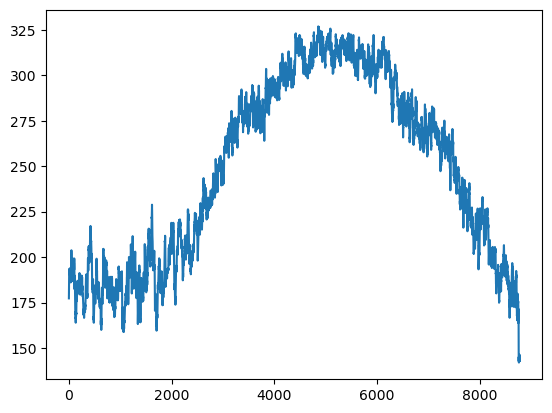

In [25]:
plt.plot(longwave_reg1_avg_doy_hrly2)
print(len(longwave_reg1_avg_doy_hrly2))

Text(0.5, 0, 'Day & Hour of Year')

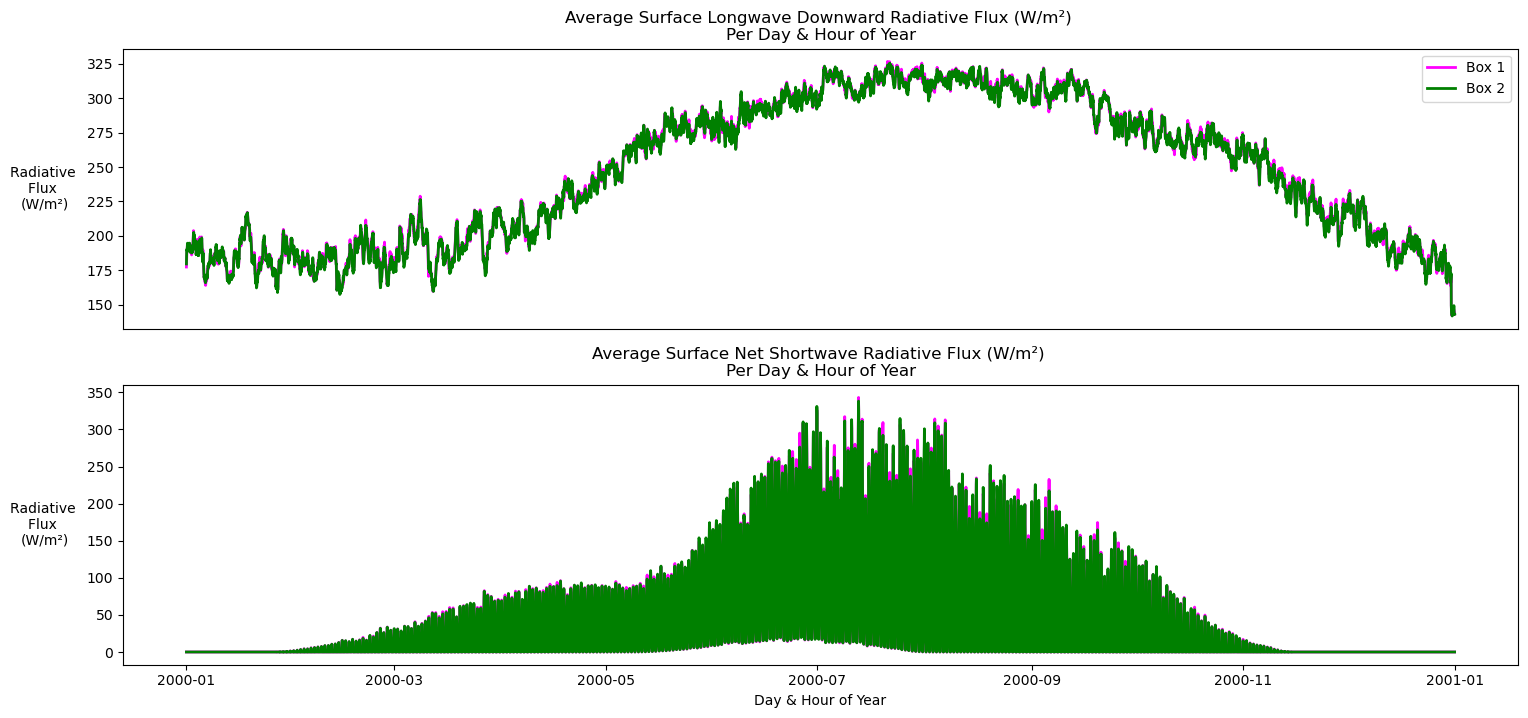

In [26]:
# Make day of year array
day_of_year = np.arange(1, 367, 1)

# Make new time index 
doy_w_hour = np.arange(1, 8785, 1)
hourly_datetimes = pd.date_range(start='2000-01-01', periods=366*24, freq='H')

# Make the figure
fig, ax = plt.subplots(2, 1, figsize=(18,8))

# Longwave
ax[0].plot(hourly_datetimes, longwave_reg1_avg_doy_hrly2, color='magenta', linewidth=2, label='Box 1')
ax[0].plot(hourly_datetimes, longwave_reg2_avg_doy_hrly2, color='green', linewidth=2, label='Box 2')
ax[0].set_title('Average Surface Longwave Downward Radiative Flux (W/m\u00b2) \nPer Day & Hour of Year')
ax[0].set_ylabel('Radiative \nFlux \n(W/m\u00b2)', rotation=0, va='center', labelpad=30)
ax[0].xaxis.set_visible(False)
ax[0].legend()

# Shortwave
ax[1].plot(hourly_datetimes, shortwave_reg1_avg_doy_hrly2, color='magenta', linewidth=2, label='Box 1')
ax[1].plot(hourly_datetimes, shortwave_reg2_avg_doy_hrly2, color='green', linewidth=2, label='Box 2')
ax[1].set_title('Average Surface Net Shortwave Radiative Flux (W/m\u00b2) \nPer Day & Hour of Year')
ax[1].set_ylabel('Radiative \nFlux \n(W/m\u00b2)', rotation=0, va='center', labelpad=30)
ax[1].set_xlabel('Day & Hour of Year')

Text(0.5, 0, 'Day & Hour of Year')

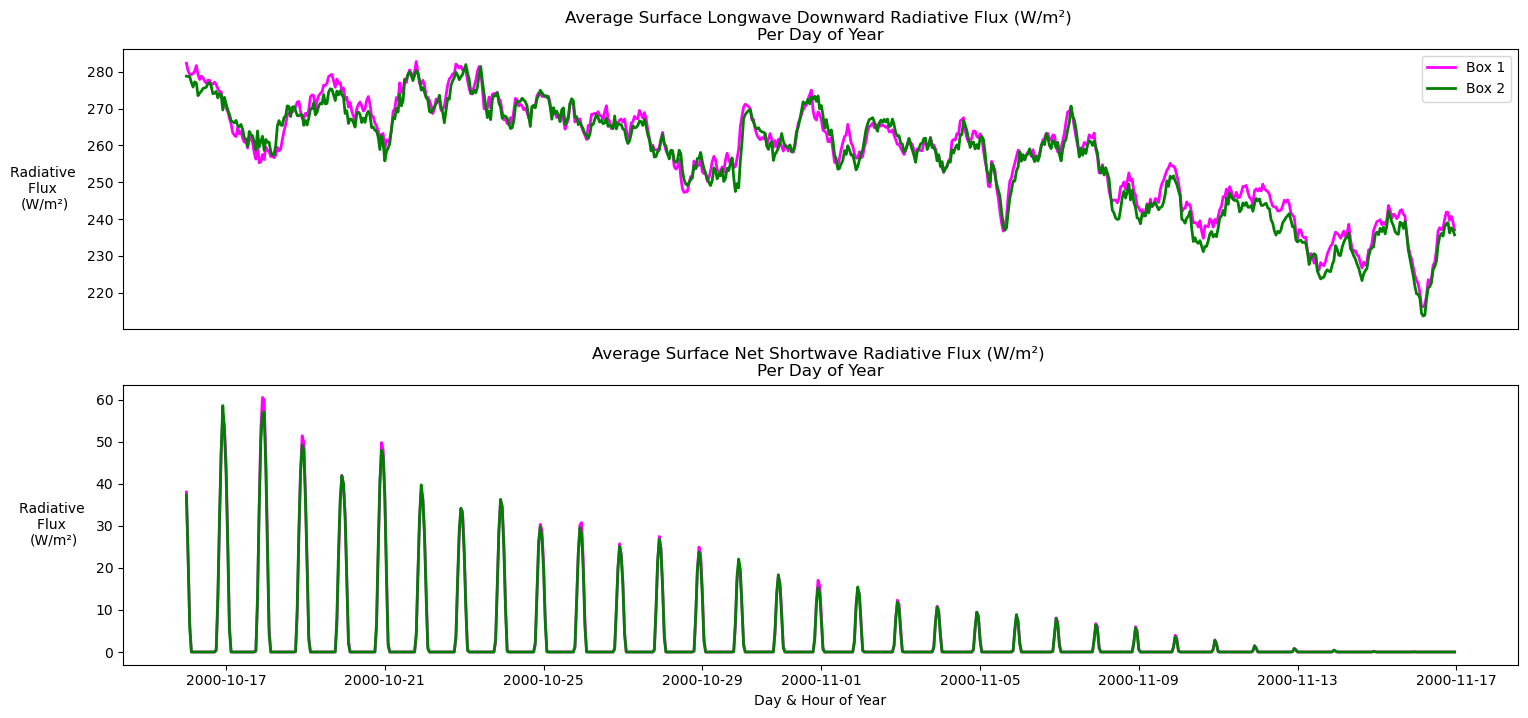

In [27]:
# Trim to just the period we want
# Plot the values around freeze-up which is mid-October to mid-November (ish)
# September 15 - October 15 = days 289 - 320 (leap year)

# Make the figure
fig, ax = plt.subplots(2, 1, figsize=(18,8))

# Longwave
ax[0].plot(hourly_datetimes[289*24:321*24], longwave_reg1_avg_doy_hrly2[289*24:321*24], color='magenta', linewidth=2, label='Box 1')
ax[0].plot(hourly_datetimes[289*24:321*24], longwave_reg2_avg_doy_hrly2[289*24:321*24], color='green', linewidth=2, label='Box 2')
ax[0].set_title('Average Surface Longwave Downward Radiative Flux (W/m\u00b2) \nPer Day of Year')
ax[0].set_ylabel('Radiative \nFlux \n(W/m\u00b2)', rotation=0, va='center', labelpad=30)
ax[0].xaxis.set_visible(False)
ax[0].legend()

# Shortwave
ax[1].plot(hourly_datetimes[289*24:321*24], shortwave_reg1_avg_doy_hrly2[289*24:321*24], color='magenta', linewidth=2, label='Box 1')
ax[1].plot(hourly_datetimes[289*24:321*24], shortwave_reg2_avg_doy_hrly2[289*24:321*24], color='green', linewidth=2, label='Box 2')
ax[1].set_title('Average Surface Net Shortwave Radiative Flux (W/m\u00b2) \nPer Day of Year')
ax[1].set_ylabel('Radiative \nFlux \n(W/m\u00b2)', rotation=0, va='center', labelpad=30)
ax[1].set_xlabel('Day & Hour of Year')

In [28]:
# Work on making an idealized version of this time series that matches
# the overall structure starting from mid-October for 9 months out
# but is simpler and has diurnal variability (base the amplitudes on
# what looks like a reasonable fluctuation from looking at the data)




In [29]:
# Before fitting a sine curve to this, shift the data
# to start in mid-October to make it easier for fitting

longwave_reg1_avg_doy_hrly2_oct_start_pt1 = longwave_reg1_avg_doy_hrly2[((289*24)+1):]
longwave_reg1_avg_doy_hrly2_oct_start_pt2 = longwave_reg1_avg_doy_hrly2[:((289*24)+1)]

# Now combine/append these two parts to get a ~9 month time series 
longwave_reg1_avg_doy_hrly2_oct_start = np.concatenate((longwave_reg1_avg_doy_hrly2_oct_start_pt1, longwave_reg1_avg_doy_hrly2_oct_start_pt2))

In [30]:
# Work on a fit...
# Focus on Box 1 since that is the one we will base everything 
# else on
from scipy.optimize import curve_fit

# Define a function to make an inital guess of a sine wave
def sine_function(x, amplitude, frequency, phase, offset):
        return amplitude * np.sin(frequency * x + phase) + offset

# Initial guess for parameters (amplitude, frequency, phase, offset)
initial_guess = [50, (1/(366*24)), 0, 250]

# Convert time to hours since initial date to help with sine fit
time0 = hourly_datetimes[0]
numeric_time = (hourly_datetimes - time0) / np.timedelta64(1, 'h')

# Calculate/Fit parameters based on real data and the initial guess
params, covariance = curve_fit(sine_function, numeric_time, longwave_reg1_avg_doy_hrly2_oct_start, p0=initial_guess)

# Pull out the parameters
amplitude_fit, frequency_fit, phase_fit, offset_fit = params

# Use these new parameters to make a new sine function that fits the data
y_fit = sine_function(numeric_time, amplitude_fit, frequency_fit, phase_fit, offset_fit)

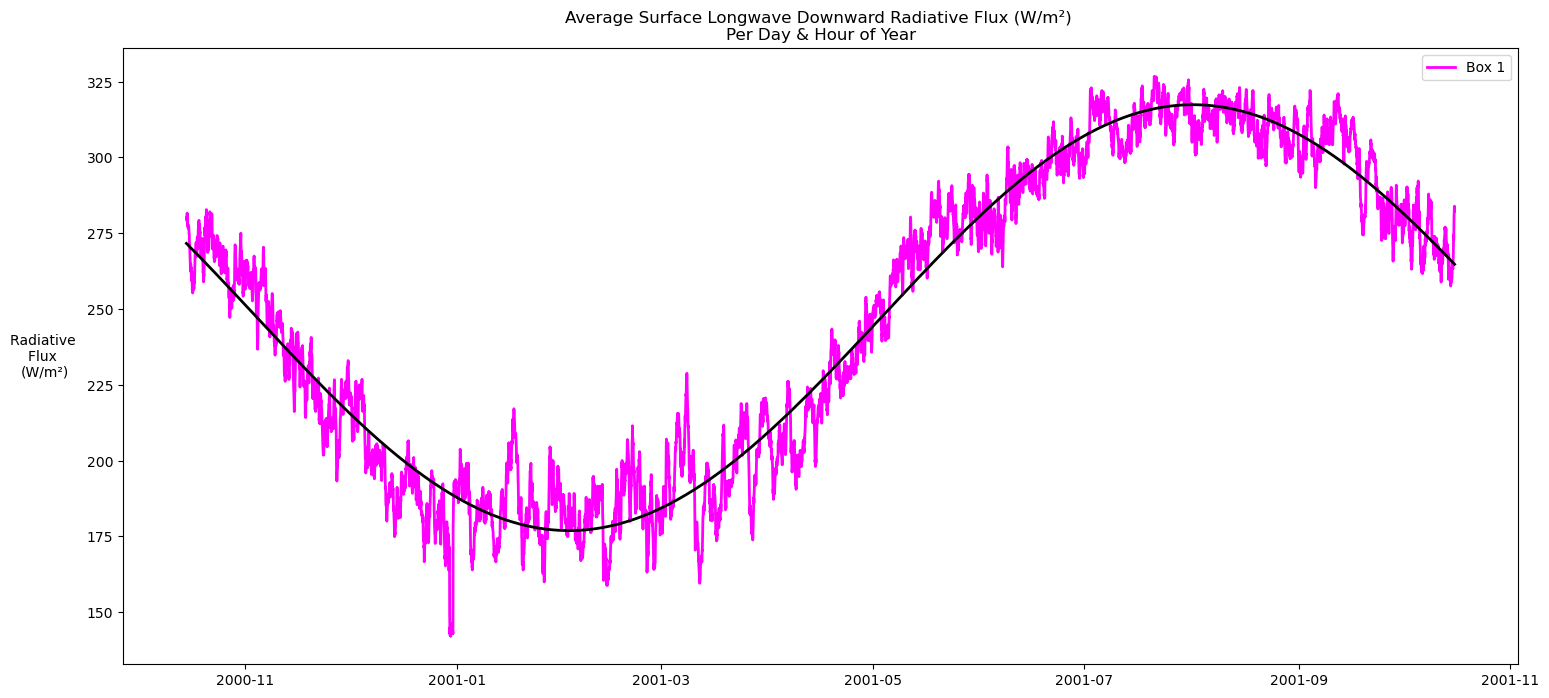

In [31]:
# Start by fitting a sine wave to the day of year (with hourly data) plot 
# and then can add daily variation, then pull out 9 months starting in late October 

# Make shifted time to go with this
hourly_datetimes_shifted = pd.date_range(start='2000-10-15', periods=366*24, freq='H')

# Plot the data
# Make the figure
fig, ax = plt.subplots(figsize=(18,8))

# Longwave
ax.plot(hourly_datetimes_shifted, longwave_reg1_avg_doy_hrly2_oct_start, color='magenta', linewidth=2, label='Box 1')
ax.plot(hourly_datetimes_shifted, y_fit, color='black', linewidth=2)

#ax.plot(hourly_datetimes, longwave_reg2_avg_doy_hrly2, color='green', linewidth=2, label='Box 2')
ax.set_title('Average Surface Longwave Downward Radiative Flux (W/m\u00b2) \nPer Day & Hour of Year')
ax.set_ylabel('Radiative \nFlux \n(W/m\u00b2)', rotation=0, va='center', labelpad=30)
#ax.xaxis.set_visible(False)
ax.legend()

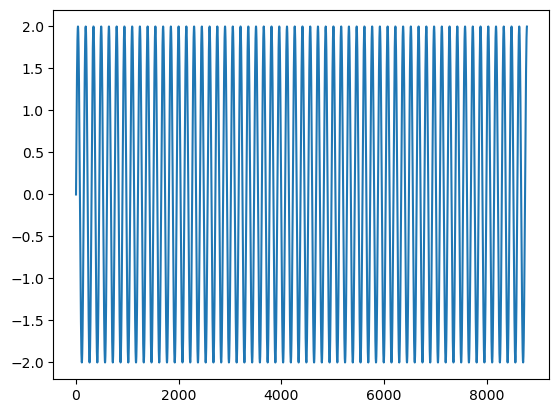

In [32]:
# Now take this curve and add daily variations of noise onto it
# Make a new sine wave that represents this wave and add them 
# together 
# You can adjust the amplitude of this "diurnal noise"
diurnal_amplitude = 2 # 2, 3

# def sine_function(x, amplitude, frequency, phase, offset):
#         return amplitude * np.sin(frequency * x + phase) + offset

# Make a curve from this 
diurnal_longwave = diurnal_amplitude * np.sin((1/(24))*numeric_time)

# diurnal_noise = diurnal_amplitude * np.sin(2 * np.pi * 1 * numeric_time + np.random.uniform(0, 2*np.pi)) # Add slight phase randomization
plt.plot(diurnal_longwave)



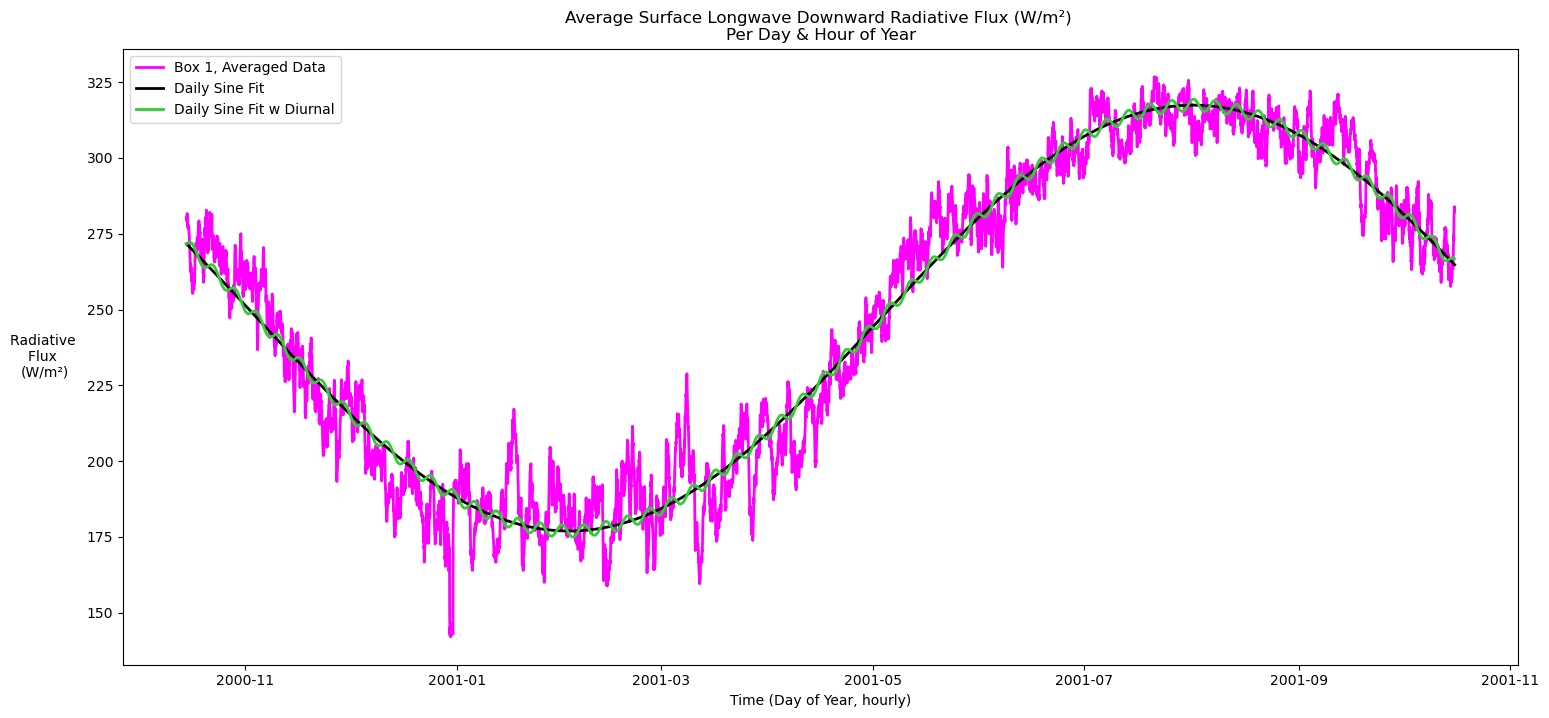

In [33]:
# NOw make a plot with these added together

# Make the figure
fig, ax = plt.subplots(figsize=(18,8))

# Longwave
ax.plot(hourly_datetimes_shifted, longwave_reg1_avg_doy_hrly2_oct_start, color='magenta', linewidth=2, label='Box 1, Averaged Data')
ax.plot(hourly_datetimes_shifted, y_fit, color='black', linewidth=2, label='Daily Sine Fit')
ax.plot(hourly_datetimes_shifted, y_fit+diurnal_longwave, color='limegreen', linewidth=2, label='Daily Sine Fit w Diurnal')

#ax.plot(hourly_datetimes, longwave_reg2_avg_doy_hrly2, color='green', linewidth=2, label='Box 2')
ax.set_title('Average Surface Longwave Downward Radiative Flux (W/m\u00b2) \nPer Day & Hour of Year')
ax.set_ylabel('Radiative \nFlux \n(W/m\u00b2)', rotation=0, va='center', labelpad=30)
ax.set_xlabel('Time (Day of Year, hourly)')
#ax.xaxis.set_visible(False)
ax.legend()



In [34]:
# Now pull out 9 months starting at October

# Add these curves together
sine_fit_w_diurnal_reg1 = y_fit+diurnal_longwave

idealized_longwave_reg1 = sine_fit_w_diurnal_reg1[:((289*24)+1)]

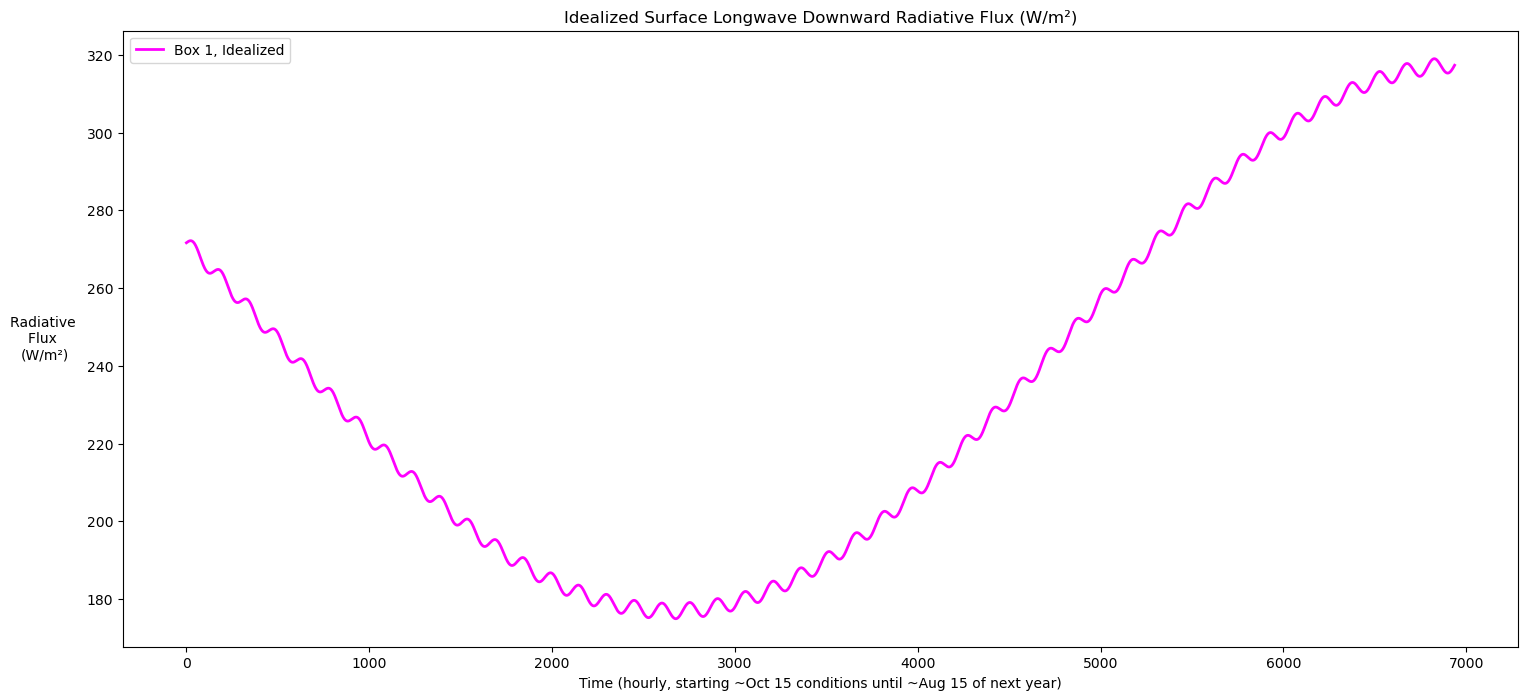

In [35]:
# Plot the idealized forcing 
# Make the figure
fig, ax = plt.subplots(figsize=(18,8))

# Longwave
ax.plot(idealized_longwave_reg1, color='magenta', linewidth=2, label='Box 1, Idealized')
ax.set_title('Idealized Surface Longwave Downward Radiative Flux (W/m\u00b2)')
ax.set_ylabel('Radiative \nFlux \n(W/m\u00b2)', rotation=0, va='center', labelpad=30)
ax.set_xlabel('Time (hourly, starting ~Oct 15 conditions until ~Aug 15 of next year)')
#ax.xaxis.set_visible(False)
ax.legend()


In [36]:

# Prep things to save this to a forcing file



### Set up the NetCDF  

The idealized model does not have any ties to lat/lon so the data can just be given in grid space rather than lat/lon and does not need to be interpolated or anything since it is spatially uniform. So we need to load the in the grid and then maybe remake this file any time you remake the grid.

In [37]:
# Load in the idealized model grid to get the dimensions 
# 500 m
grid = xr.open_dataset('/global/homes/b/bundzis/Projects/Beaufort_ROMS_idealized_jet/Include/grd_500m_002.nc')
# 1 km
#grid = xr.open_dataset('/global/homes/b/bundzis/Projects/Beaufort_ROMS_idealized_jet/Include/grd_1km_002.nc')

In [38]:
grid

<xarray.Dataset> Size: 24MB
Dimensions:      (eta_rho: 502, xi_rho: 402, eta_psi: 501, xi_psi: 401,
                  eta_u: 502, xi_u: 401, eta_v: 501, xi_v: 402)
Dimensions without coordinates: eta_rho, xi_rho, eta_psi, xi_psi, eta_u, xi_u,
                                eta_v, xi_v
Data variables: (12/18)
    x_rho        (eta_rho, xi_rho) float64 2MB ...
    y_rho        (eta_rho, xi_rho) float64 2MB ...
    x_psi        (eta_psi, xi_psi) float64 2MB ...
    y_psi        (eta_psi, xi_psi) float64 2MB ...
    x_u          (eta_u, xi_u) float64 2MB ...
    y_u          (eta_u, xi_u) float64 2MB ...
    ...           ...
    angle        (eta_rho, xi_rho) float64 2MB ...
    spherical    bool 1B ...
    xl           float64 8B ...
    el           float64 8B ...
    visc_factor  (eta_rho, xi_rho) float64 2MB ...
    diff_factor  (eta_rho, xi_rho) float64 2MB ...

In [39]:
# Pull out grid dimensions 
# Read in the dimensions
# rho
eta_rho_len = len(grid.eta_rho) # 206
xi_rho_len = len(grid.xi_rho) # 608
print('eta_rho_len: ', eta_rho_len)
print('xi_rho_len: ', xi_rho_len)
# u
eta_u_len = len(grid.eta_u) # 206
xi_u_len = len(grid.xi_u) # 607
print('eta_u_len: ', eta_u_len)
print('xi_u_len: ', xi_u_len)
# v
eta_v_len = len(grid.eta_v) #
xi_v_len = len(grid.xi_v) # 
print('eta_v_len: ', eta_v_len)
print('xi_v_len: ', xi_v_len)

# Define other dimension lengths
# eta rho
Mp = len(grid.eta_rho)
# xi rho
Lp = len(grid.xi_rho)
print('Mp: ', Mp)
print('Lp: ', Lp)

# # latitude
# lat_u_len = len(grid.lat_u)
# lat_v_len = len(grid.lat_v)
# print('lat_u_len: ', lat_u_len)
# print('lat_v_len: ', lat_v_len)

# # longitude
# lon_u_len = len(grid.lon_u)
# lon_v_len = len(grid.lon_v)
# print('lon_u_len: ', lon_u_len)
# print('lon_v_len: ', lon_v_len)

eta_rho_len:  502
xi_rho_len:  402
eta_u_len:  502
xi_u_len:  401
eta_v_len:  501
xi_v_len:  402
Mp:  502
Lp:  402


In [40]:
# TMP Grid Check
grid.x_rho.values

array([[     0.,    500.,   1000., ..., 199500., 200000., 200500.],
       [     0.,    500.,   1000., ..., 199500., 200000., 200500.],
       [     0.,    500.,   1000., ..., 199500., 200000., 200500.],
       ...,
       [     0.,    500.,   1000., ..., 199500., 200000., 200500.],
       [     0.,    500.,   1000., ..., 199500., 200000., 200500.],
       [     0.,    500.,   1000., ..., 199500., 200000., 200500.]])

In [41]:
grid.y_rho.dtype


dtype('float64')

In [42]:
# TMP Grid Check
grid.x_psi.values

array([[   250.,    750.,   1250., ..., 199250., 199750., 200250.],
       [   250.,    750.,   1250., ..., 199250., 199750., 200250.],
       [   250.,    750.,   1250., ..., 199250., 199750., 200250.],
       ...,
       [   250.,    750.,   1250., ..., 199250., 199750., 200250.],
       [   250.,    750.,   1250., ..., 199250., 199750., 200250.],
       [   250.,    750.,   1250., ..., 199250., 199750., 200250.]])

In [43]:
# Need to make a time that is hours since some reference time 
# Get the length of time for the data

# convert all the times to seconds since the first time step so it is on generic time)
#time_tmp = ((hourly_datetimes_shifted[:] - datetime(0,12,31)).total_seconds() - 86400)
time_tmp_1 = ((hourly_datetimes_shifted[:] - hourly_datetimes_shifted[0]).total_seconds())
# Trim to just the time we want
time_tmp = time_tmp_1[:len(idealized_longwave_reg1)]
# Get the length from this 
# time
time_len = len(time_tmp)

In [44]:
time_tmp

Index([       0.0,     3600.0,     7200.0,    10800.0,    14400.0,    18000.0,
          21600.0,    25200.0,    28800.0,    32400.0,
       ...
       24937200.0, 24940800.0, 24944400.0, 24948000.0, 24951600.0, 24955200.0,
       24958800.0, 24962400.0, 24966000.0, 24969600.0],
      dtype='float64', length=6937)

In [45]:
print('len time_tmp: ', len(time_tmp))
print('len hourly_datetimes_shifted: ', len(hourly_datetimes_shifted))
print('len idealized_longwave_reg1: ', len(idealized_longwave_reg1))

len time_tmp:  6937
len hourly_datetimes_shifted:  8784
len idealized_longwave_reg1:  6937


In [46]:
# Make a version of the code that is this shape and same everywhere
idealized_longwave_reg1_ongrid = np.empty((time_len, eta_rho_len, xi_rho_len))

# Loop through space and fill with the idealized version
for y in range(eta_rho_len):
    for x in range(xi_rho_len):
        idealized_longwave_reg1_ongrid[:,y,x] = idealized_longwave_reg1

# Could insert a check for this at some point...


In [47]:
# Check units - should be watts meter-2
print('ERA5 surface downward longwave radiation flux units: ', era5_longwave.avg_sdlwrf.units)

ERA5 surface downward longwave radiation flux units:  W m**-2


In [48]:
# Make an array of 0 to use for shortwave 
swrad_zeros_ongrid = np.zeros_like((idealized_longwave_reg1_ongrid))

In [49]:
#swrad_zeros_ongrid

In [50]:
# Make the netcdf for the forcing file 

# ------------------------------- Create the netCDF file ---------------------------

#name of file I am writing to
# 500 m
longwave_shortwave_frc = '/pscratch/sd/b/bundzis/Beaufort_ROMS_idealized_jet_scratch/Forcing_files/idealized_longwave_downward_shortwave_forcing_500m_002.nc'   #UPDATE PATH
# 1 km
#longwave_shortwave_frc = '/pscratch/sd/b/bundzis/Beaufort_ROMS_idealized_jet_scratch/Forcing_files/idealized_longwave_downward_shortwave_forcing_1km_002.nc'   #UPDATE PATH

#create file to write to
nc1 = Dataset(longwave_shortwave_frc, 'w', format='NETCDF4')

#Global attributes
global_defaults = dict(gridname = '*.nc',
                      type = 'ROMS grid-shaped ERA5 idealized mean downward longwave radiation and shortwave flux forcing',
                      history = 'Created by Brianna Undzis',
                      Conventions = 'CF',
                      Institution = 'University of Colorado Boulder',
                      date = str(datetime.today()))
    
#create dictionary for model
d = {}
d = global_defaults

for att, value in d.items():
    setattr(nc1, att, value)

# Create dimensions
nc1.createDimension('xi_rho',  xi_rho_len)   # rho
nc1.createDimension('eta_rho', eta_rho_len)
# nc1.createDimension('lon',  era5_lon_len)   # rho
# nc1.createDimension('lat', era5_lat_len)
nc1.createDimension('lrf_time', None)
nc1.createDimension('srf_time', None)
nc1.createDimension('one',     1)

# Create variables 
# --------------------
# Coordinate Variables
# --------------------
# # era5 lon
# lon = nc1.createVariable('lon', 'd', ('lon',), zlib=True)
# lon.long_name = 'longitude coordinate of ERA5 data'
# lon.standard_name = 'projection_lon_coordinate'
# lon.units = 'degrees'
# lon_tmp = era5_longwave.longitude
# lon[:] = lon_tmp[:]

# # era5 lat
# lat = nc1.createVariable('lat', 'd', ('lat',), zlib=True)
# lat.long_name = 'latitude coordinate of ERA5 data'
# lat.standard_name = 'projection_lat_coordinate'
# lat.units = 'degrees'
# #lat_tmp = era5_longwave.latitude
# lat_tmp = lat_flip # FLIP
# lat[:] = lat_tmp[:]

# xi rho
xi_rho = nc1.createVariable('xi_rho', 'd', ('xi_rho',), zlib=True)
xi_rho.long_name = 'xi coordinate of RHO-points'
xi_rho.standard_name = 'projection_xi_coordinate'
xi_rho.units = 'meter'
xi_rho_tmp = np.arange(0, Lp)
xi_rho[:] = xi_rho_tmp[:]

# eta rho
eta_rho = nc1.createVariable('eta_rho', 'd', ('eta_rho',), zlib=True)
eta_rho.long_name = 'eta coordinate of RHO-points'
eta_rho.standard_name = 'projection_eta_coordinate'
eta_rho.units = 'meter'
eta_rho_tmp = np.arange(0, Mp)
eta_rho[:] = eta_rho_tmp[:]

# lrf_time (in seconds)
lrf_time_g = nc1.createVariable('lrf_time', None, ('lrf_time'), zlib=True)
lrf_time_g.long_name = 'seconds since 0001-01-01 00:00:00' #with initialization of 2000-01-01 00:00:00
lrf_time_g.units = 'second'
lrf_time_g.field = 'time, scalar, series'
lrf_time_g[:] = time_tmp[:]

# srf_time (in seconds)
srf_time_g = nc1.createVariable('srf_time', None, ('srf_time'), zlib=True)
srf_time_g.long_name = 'seconds since 0001-01-01 00:00:00' #with initialization of 2000-01-01 00:00:00
srf_time_g.units = 'second'
srf_time_g.field = 'time, scalar, series'
srf_time_g[:] = time_tmp[:]

# --------------------
# Radiation Flux Variables 
# --------------------

# downward longwave radiation flux
lwrad_down_interp_g = nc1.createVariable('lwrad_down', 'f8', ('lrf_time', 'eta_rho', 'xi_rho'), zlib=True, fill_value=1e30)
lwrad_down_interp_g.long_name = 'downward longwave radiation flux'
lwrad_down_interp_g.standard_name = 'surface_downward_longwave_flux'
lwrad_down_interp_g.units = 'watt meter-2' 
lwrad_down_interp_g.coordinates = 'eta_rho xi_rho'
lwrad_down_interp_g[:,:,:] = idealized_longwave_reg1_ongrid[:,:,:]

# downward shortwave radiation flux
swrad_interp_g = nc1.createVariable('swrad', 'f8', ('srf_time', 'eta_rho', 'xi_rho'), zlib=True, fill_value=1e30)
swrad_interp_g.long_name = 'net solar shortwave radiation flux'
swrad_interp_g.standard_name = 'net_downward_shortwave_flux_at_sea_water_surface'
swrad_interp_g.units = 'watt meter-2' 
swrad_interp_g.coordinates = 'eta_rho xi_rho'
swrad_interp_g[:,:,:] = swrad_zeros_ongrid[:,:,:]

nc1.close()
# ------------------------------- End netCDF ---------------------------

In [51]:
# Close